In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import neurd

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
from mesh_tools import trimesh_utils as tu
from datasci_tools import ipyvolume_utils as ipvu
from neurd import neuron_visualizations as nviz

In [4]:
segment_id = 864691134917511946

# Load the appropriate volume data inferface object

In [59]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

In [60]:
synapse_filepath = f'/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/{segment_id}_synapses.csv'
synapse_filepath

'/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/864691134917511946_synapses.csv'

In [61]:
vdi.set_synapse_filepath(
    synapse_filepath
)

In [62]:
# from datasci_tools import pandas_utils as pu
# df = pu.csv_to_df(synapse_filepath)

# from neurd import synapse_utils as syu
# from datasci_tools import ipyvolume_utils as ipvu
# coords = df[["synapse_x","synapse_y","synapse_z"]].to_numpy()
# ipvu.plot_objects(
#     n1.mesh,
#     scatters=[coords]
# )

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Data Prep: Loading mesh

In [6]:
mesh = vdi.fetch_segment_id_mesh(
    segment_id,
    plot = True
)
mesh

/usr/local/lib/python3.8/dist-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

<trimesh.Trimesh(vertices.shape=(420741, 3), faces.shape=(865980, 3))>

In [7]:
from datasci_tools import pipeline

products = pipeline.PipelineProducts()
products

# Step 1: Decimation

In [8]:
"""
NOTE: an already decimated mesh is used for the example
in order to speed up time, that's why the mesh_dec
object will be overwritten with original mesh object
"""

"\nNOTE: an already decimated mesh is used for the example\nin order to speed up time, that's why the mesh_dec\nobject will be overwritten with original mesh object\n"

In [9]:
decimation_parameters = dict(
    decimation_ratio =0.25,
)

In [10]:
mesh_decimated = tu.decimate(
    mesh,
    **decimation_parameters
)

xvfb-run -n 2940 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_29300.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_29300_decimated.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/decimation_meshlab_25361360.mls


In [11]:
# saving any parameters used or output products for later use
products.set_stage_attrs(
    stage = "decimation",
    attr_dict = dict(
        decimation_parameters = decimation_parameters,
        segment_id = segment_id,
    ),
    
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
}



# Step 2: Soma Identification

In [12]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

In [13]:
from neurd import soma_extraction_utils as sm
soma_extraction_parameters = dict()

In [14]:
# could inspect the parameters of a certain category
from neurd import parameter_utils as paru
paru.category_param_from_module(
        module = sm,
        category = "glia",
)

{'glia_volume_threshold_in_um_global': 2500,
 'glia_n_faces_threshold_global': 400000,
 'glia_n_faces_min_global': 100000}

In [15]:
# overwritting decimated mesh because original was already decimated
mesh_decimated = mesh

In [16]:
from neurd import neuron_visualizations as nviz

verbose = True

soma_products = sm.soma_indentification(
    mesh_decimated,
    verbose=verbose,
    **soma_extraction_parameters
)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 5000.0 
large_mesh_threshold_inner = 3250.0 
soma_size_threshold = 562.5 
soma_size_threshold_max = 75000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
max_mesh_sized_filtered_away = 22500.0
xvfb-run -n 2101 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_37586.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_37586_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_921565.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_37586.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_37586_remove_interior.off
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_921565.mls is being deleted....
There were 13 tot

  0%|          | 0/13 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.779125]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 580 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_886935.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_886935_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_239418.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_886935.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_886935_poisson.off
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_239418.mls is being deleted....
Inside sphere validater: ratio_val = 3.4043175212335024
----- working on mesh after poisson #1: <trimesh.Trimesh(vertices.shape=(3

  0%|          | 0/1 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.5418655]
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_586808.mls is being deleted....
Inside sphere validater: ratio_val = 769.5128726957494
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(767, 3), faces.shape=(1534, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0
Going to run cgal segmentation with:
File: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/915_mesh 
clusters:3 
smoothness:0.2

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

mesh.is_watertight = True
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_95025.mls is being deleted....
Inside sphere validater: ratio_val = 769.5128726957494
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(767, 3), faces.shape=(1534, 3))>, curr_side_len_check = True, curr_volume_check = False
----- working on mesh after poisson #2: <trimesh.Trimesh(vertices.shape=(2914, 3), faces.shape=(5824, 3))>
xvfb-run -n 9624 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/decimation_meshlab_25203409.mls

-------Splits after inner decimation len = 1-----

  0%|          | 0/6 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.45577199999999995]
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_746676.mls is being deleted....
Inside sphere validater: ratio_val = 318.4759330340049
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(524, 3), faces.shape=(1040, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0019230769230769232
Going to run cgal segmentation with:
File: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/169_mesh 
clusters:3 
smoothness:0.2

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

mesh.is_watertight = True
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_666854.mls is being deleted....
Inside sphere validater: ratio_val = 318.4759330340049
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(524, 3), faces.shape=(1040, 3))>, curr_side_len_check = True, curr_volume_check = False
----- working on mesh after poisson #3: <trimesh.Trimesh(vertices.shape=(2561, 3), faces.shape=(5122, 3))>
xvfb-run -n 174 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/decimation_meshlab_25203409.mls

-------Splits after inner decimation len = 1-----

  0%|          | 0/7 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(210, 3), faces.shape=(418, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(210, 3), faces.shape=(418, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(252, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(252, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #4: <trimesh.Trimesh(vertices.shape=(2505, 3), faces.shape=(5006, 3))>
xvfb-run -n 8236 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/decimation_meshlab_25203409.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(627, 3), faces.shape=(1250, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(627, 3), faces.shape=(1250, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max =

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.45000850000000003]
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_174578.mls is being deleted....
Inside sphere validater: ratio_val = 44.002011369429006
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(294, 3), faces.shape=(582, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0
Going to run cgal segmentation with:
File: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/485_mesh 
clusters:3 
smoothness:0.2

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

Could not find valid soma mesh in retry
----- working on mesh after poisson #5: <trimesh.Trimesh(vertices.shape=(2190, 3), faces.shape=(4376, 3))>
xvfb-run -n 6356 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/decimation_meshlab_25203409.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(549, 3), faces.shape=(1094, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(549, 3), faces.shape=(1094, 3))>
soma_size_thr

  0%|          | 0/5 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(230, 3), faces.shape=(454, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(230, 3), faces.shape=(454, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(108, 3), faces.shape=(207, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(108, 3), faces.shape=(207, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

----- working on mesh after poisson #6: <trimesh.Trimesh(vertices.shape=(2089, 3), faces.shape=(4174, 3))>
xvfb-run -n 1153 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/decimation_meshlab_25203409.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(523, 3), faces.shape=(1042, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(523, 3), faces.shape=(1042, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max =

  0%|          | 0/3 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(265, 3), faces.shape=(523, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(265, 3), faces.shape=(523, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(174, 3), faces.shape=(340, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(174, 3), faces.shape=(340, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #7: <trimesh.Trimesh(vertices.shape=(2076, 3), faces.shape=(4148, 3))>
xvfb-run -n 3889 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/decimation_meshlab_25203409.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(520, 3), faces.shape=(1036, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(520, 3), faces.shape=(1036, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max =

  0%|          | 0/5 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(389, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(389, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(389, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(389, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #8: <trimesh.Trimesh(vertices.shape=(1712, 3), faces.shape=(3420, 3))>
xvfb-run -n 5562 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/12345/decimation_meshlab_25203409.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(429, 3), faces.shape=(854, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(429, 3), faces.shape=(854, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 7

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.548969]
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_826415.mls is being deleted....
Inside sphere validater: ratio_val = 264.5780977148202
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(309, 3), faces.shape=(612, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0032679738562091504
Going to run cgal segmentation with:
File: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/320_mesh 
clusters:3 
smoothness:0.2

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

Could not find valid soma mesh in retry



 Total time for run = 145.07651162147522
Before Filtering the number of somas found = 1

---Performing Soma Mesh Backtracking to original mesh for poisson soma 0
backtrack_soma_size_threshold = 8000
xvfb-run -n 2055 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_68774.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_68774_fill_holes.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/fill_holes_263987.mls

---- meshlab output -----
QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Current Plugins Dir is: /meshlab/src/distrib/plugins 
Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or javascript code; please delete all the spurious xml files
Error While parsing the XML filter plugin descriptors: We are trying to load a xml

  0%|          | 0/19 [00:00<?, ?it/s]

Largest hole before segmentation = 195442.17366895775, after = 578941.165186773,

ratio = 2.9622120667128398, difference = 383498.9915178153
filtered_soma_list_components = [<trimesh.Trimesh(vertices.shape=(19848, 3), faces.shape=(39717, 3))>]
Not need to do a second pass because already found a soma


In [17]:
sm.plot_soma_products(
    mesh_decimated,
    soma_products = soma_products,
    verbose = True
)

# of somas = 1
# of glia = 0
# of nuclei = 15


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [18]:
soma_products.soma_extraction_parameters = soma_extraction_parameters
soma_products

In [19]:
products.set_stage_attrs(
    stage = "soma_identification",
    attr_dict = soma_products,
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>, <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>, <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>, <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>, <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>, <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>, <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>, <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>, <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>, <trimesh.Trimesh(vertices.shape=(2419, 3), faces.shape=(4893, 3))>, <trimesh.Trimesh(vertices.shape=(1665, 3), faces.shape=(2568, 3))>, <trimesh.Trimesh(vertices.shape=(1619, 3), faces

# Step 2b: Saving off pipeline products

In [20]:
from datasci_tools import system_utils as su
su.save_object(
    products,"products_up_to_soma_stage"
)

Saved object at /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/products_up_to_soma_stage.pkl
File size is 23.117923 MB
Cleared mesh: <trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>:139667027980832
Cleared mesh: <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>:139667027983664
Cleared mesh: <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>:139667027998848
Cleared mesh: <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>:139667028009936
Cleared mesh: <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>:139667028012768
Cleared mesh: <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>:139667027983184
Cleared mesh: <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>:139667027975472
Cleared mesh: <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>:139663922286656
Cleared mesh: <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>:139663922350448

# Step 3: Decomposition

In [21]:
from neurd import neuron

neuron_obj = neuron.Neuron(
    mesh = mesh,
    segment_id = segment_id, # don't need this explicitely if segment_id is already in products
    pipeline_products = products,
    suppress_preprocessing_print=False,
    suppress_output=False,
)

neuron_obj

--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
Skipping the hole filling
limb_remove_mesh_interior_face_threshold = 0
use_meshafterparty = True
Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(19848, 3), faces.shape=(39717, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(19848, 3), faces.shape=(39717, 3))>]
soma_mesh_list_centers = [array([ 553544.98545949,  749839.54254837, 1047338.92563482])]
Getting Glia and Nuclei Pieces Subtracted Away 0.29314184188842773
 Splitting mesh after soma cancellation 1.7357769012451172
# of split_meshes = 4
 Containing Mesh Indices 0.035221099853515625
containing_mesh_indices = {0: 0}
 non_soma_touching_meshes 1.33514404296875e-05
There were 3 pieces found after size threshold
 Finding inside pieces and non_soma_touching meshes 0.4612243175506592
soma_containing_meshes = {0: [0]}

-----Before combining multiple mesh pieces-----
soma_containing_meshes = {0: [0]}

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/197064 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.71s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 3.0559520721435547
connecting at the root
branches_touching_root = [26]
combining close nodes
combine_threshold = 700
length of Graph = 16119
After combining close endpoints max(kept_branches_idx) = 26, len(kept_branches_idx) = 26
empty_indices % = 0.0
 conflict_indices % = 0.0037420005192980313


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Decomposing first pass: 13.415770530700684
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [69452, 13220, 555, 4355, 39115, 7600, 8197, 5651, 4876, 10061, 6628, 14716, 6171]
mesh_large_connectivity: 0.4817221164703369
Finding MAP candidates connected components: 0.0001380443572998047
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.2891850471496582
Grouping MP Sublimbs by Graph: 0.12074589729309082
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.01261138916015625
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 7829 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neur

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.07514429092407227
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 144.83651566505432
Checking connected components after removing cycles
Total time for mesh KDTree = 1.8014335632324219
sbv[0].reshape(-1,3) = [[ 550001.9  743270.1 1043789. ]]
closest_sk_pt_coord BEFORE = [ 549775.  742865. 1045410.]
current_skeleton.shape = (4663, 2, 3)
node_for_stitch = 4458: [ 549775.  742865. 1045410.]
node_for_stitch AFTER = 4458: [ 549775.  742865. 1045410.]
possible_node_loc = [  33  322  382  512  918 1152 1450 1521 1605 1690 1768 1951 1996 2340
 2435 2439 2690 2726 2734 2802 2804 3030 3060 3126 3237 3361 3397 3434
 3518 3727 4058 4094 4134 4445 4460 4636 4663]
possible_node_loc AFTER = [  33  322  382  512  918 1152 1450 1521 1605 1690 1768 1951 1996 2340
 2435 2439 2690 2726 2734 2802 2804 3030 3060 3126 3237 3361 3397 3434
 3518 3727 40

  0%|          | 0/30 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (4545, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 1 valid paths to replace
valid_paths = [array([3945., 3947., 3959.])]
valid_path_lengths = [540.8038090822604]
length of Graph = 4546
Working on path [3945. 3947. 3959.]
path_degrees = [3, 2, 3]
skeletonize_and_clean_connected_branch_CGAL: 159.0273199081421
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8144 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_99519.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_99519_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_926400.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_99519.off
removed temporary output 

0it [00:00, ?it/s]

Total time for decomposition = 25.353606462478638
mesh_correspondence_first_pass: 25.353680849075317
Limb decomposed into 10 branches
divided_skeleton_graph_recovered = (4543, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (4543, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (9, 10)
empty_indices % = 0.20319837143291866
 conflict_indices % = 0.018148239479110373


  0%|          | 0/475 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 199.2592101097107
correspondence_1_to_1: 14.865560054779053
Total time for MAP sublimb processing 199.25929856300354
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.014664173126220703
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.015482664108276367
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0015645027160644531
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0024628639221191406
Do Not Need to Fix MP Decomposition 3 so just continuing
---- Working on MP Decomposition 

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.19889873876421874
 conflict_indices % = 0.0038270153699300883


  0%|          | 0/68 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 3]
MP_branches_for_correspondence = [0 3]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [ 563290.32537776  726396.29725494 1040712.26167108]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [7]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2476798143851508
 conflict_indices % = 0.012782504081808026


  0%|          | 0/123 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [ 528048.23493116  738378.68018906 1076921.83034921]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.25810084907295094
 conflict_indices % = 0.00857736960665396


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2786418400876232
 conflict_indices % = 0.01606425702811245


  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 




---- Working on (3, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [ 544165.4049786   721897.99254932 1044831.71286521]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.18759615384615386
 conflict_indices % = 0.00021634615384615385


  0%|          | 0/190 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.20230387702559444
 conflict_indices % = 0.00430675450552779


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (3, 0) 




---- Working on (4, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [ 515656.61063332  738420.63084309 1027362.50549421]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.21229641693811074
 conflict_indices % = 0.0030537459283387623


  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.24701850582590815
 conflict_indices % = 0.01286269134110121


  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (4, 0) 




---- Working on (5, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [ 552421.37615997  736725.93864965 1031610.1967896 ]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [3]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.24907203820601934
 conflict_indices % = 0.0004964891127030286


  0%|          | 0/127 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.25794562837442714
 conflict_indices % = 0.0043927051175694605


  0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (5, 0) 




---- Working on (6, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [ 539700.08052065  687414.11271422 1039892.58772448]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.19324120451390983
 conflict_indices % = 0.0009414036569911291


  0%|          | 0/183 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.21695765265068584
 conflict_indices % = 0.004182338741368663


  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (6, 0) 



Time for decomp of Limb = 328.996497631073
Number of matching vertices = 89
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/28 [00:00<?, ?it/s]

392837 392838
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 1 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 554358.   749290.5 1039952. ]
Time for preparing soma vertices and root: 0.00021004676818847656
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/63606 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.21it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.7097091674804688
connecting at the root
branches_touching_root = [4]
combining close nodes
combine_threshold = 700
length of Graph = 4691
After combining close endpoints max(kept_branches_idx) = 4, len(kept_branches_idx) = 5
empty_indices % = 0.0
 conflict_indices % = 0.0027349400447391928


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Decomposing first pass: 4.855079650878906
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [40620, 4730, 29031]
mesh_large_connectivity: 0.05169510841369629
Finding MAP candidates connected components: 0.00012636184692382812
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.12291550636291504
Grouping MP Sublimbs by Graph: 0.043840885162353516
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.01714920997619629
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 8341 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/t

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/3 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.08950543403625488
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 83.34431314468384
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.12391257286071777
filter_end_node_length = 4000


  0%|          | 0/49 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (2102, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 87.87108087539673
Working on limb correspondence for #0 MAP piece
xvfb-run -n 6313 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_71119.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_71119_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_343984.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_71119.off
removed temporary output file: /ne

0it [00:00, ?it/s]

Total time for decomposition = 10.999527931213379
mesh_correspondence_first_pass: 10.999590873718262
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (2102, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (2102, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2597840846452723
 conflict_indices % = 0.0012368750084026834


  0%|          | 0/244 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 102.31434059143066
correspondence_1_to_1: 3.4265568256378174
Total time for MAP sublimb processing 102.31444978713989
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.014248371124267578
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.03582882881164551
Fixing Possible Soma Extension Branch for Sublimb 1
Total time for mesh KDTree = 0.20942115783691406
sbv[0].reshape(-1,3) = [[ 554358.   749290.5 1039952. ]]
closest_sk_pt_coord BEFORE = [ 556602.02796298  748554.33839125 1033297.39006678]
current_skeleton.shape = (1207, 2, 3)
node_for_stitch = 1191: [ 556602.02796298  748554.33839125 1033297.39006678]
node_for_stitch AFTER = 1191: [ 556602.02796298  748554.33839125 1033297.39006678]
possible_node_loc = [346 945]
possible_node_loc AFTER 

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.3021926634105788
 conflict_indices % = 0.007031764176105858


  0%|          | 0/69 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

curr_width_median = 316.6865151196587
curr_width_median = 847.7987326696455
curr_width_median = 1118.7652148901063
checked segment branches after soma add on
MP (because soma touching verts) soma extension add: 4.465644121170044
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [ 553291.08253277  753103.90798636 1009036.57433233]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.2723516369604653
 conflict_indices % = 0.0005039016384001842


  0%|          | 0/230 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.25825343241406834
 conflict_indices % = 0.007711472298018745


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [1]
conn = [1]
winning_vertex = [ 550755.20472931  753610.13232065 1019827.00076467]
MP_branches_with_stitch_point = [1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.26448773734177217
 conflict_indices % = 0.005933544303797469


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.26543605615121035
 conflict_indices % = 0.010898640433292804


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [1]
MP_branches_for_correspondence = [1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 



Time for decomp of Limb = 146.31411695480347
Number of matching vertices = 49
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/9 [00:00<?, ?it/s]

126510 126511
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 2 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 560775.   752816.8 1055182. ]
Time for preparing soma vertices and root: 0.00029468536376953125
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/44944 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.60it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.6210193634033203
branches_touching_root = [2]
combining close nodes
combine_threshold = 700
length of Graph = 4031
After combining close endpoints max(kept_branches_idx) = 14, len(kept_branches_idx) = 14
empty_indices % = 0.0
 conflict_indices % = 0.005704989637421167


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Decomposing first pass: 4.16572642326355
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [1700, 3065, 35315]
mesh_large_connectivity: 0.023195981979370117
Finding MAP candidates connected components: 8.296966552734375e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.07344198226928711
Grouping MP Sublimbs by Graph: 0.033582210540771484
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.010788917541503906
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 9793 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/t

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.0773763656616211
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 27.019914865493774
Checking connected components after removing cycles
Total time for mesh KDTree = 0.20708131790161133
sbv[0].reshape(-1,3) = [[ 560775.   752816.8 1055182. ]]
closest_sk_pt_coord BEFORE = [ 561374.  752449. 1055710.]
current_skeleton.shape = (1233, 2, 3)
node_for_stitch = 0: [ 561374.  752449. 1055710.]
node_for_stitch AFTER = 0: [ 561374.  752449. 1055710.]
possible_node_loc = [   0   59   73  168  233  239  240  251  300  319  343  374  459  473
  494  544  552  619  715  824  827  868  893  999 1014 1052 1115 1180
 1195 1233]
possible_node_loc AFTER = [   0   59   73  168  233  239  240  251  300  319  343  374  459  473
  494  544  552  619  715  824  827  868  893  999 1014 1052 1115 1180
 1195 1233]
curr_shortest_path = [0]
Current stitch po

  0%|          | 0/27 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1084, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 29.26982831954956
Working on limb correspondence for #0 MAP piece
xvfb-run -n 9201 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_99389.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_99389_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_71601.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_99389.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron

0it [00:00, ?it/s]

Total time for decomposition = 5.636153936386108
mesh_correspondence_first_pass: 5.636228322982788
Limb decomposed into 5 branches
divided_skeleton_graph_recovered = (1084, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1084, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.24241516966067864
 conflict_indices % = 0.012724550898203593


  0%|          | 0/124 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 37.74550127983093
correspondence_1_to_1: 2.828613758087158
Total time for MAP sublimb processing 37.74559307098389
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.017330408096313477
Do Not Need to Fix MP Decomposition 0 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 5]
conn = [0, 5]
winning_vertex = [ 562145.73810209  747810.29072226 1071042.77744516]
MP_branches_with_stitch_point = [0, 5]
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.33936824414651845
 conflict_indices % = 0.005309193690080593


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 5]
MP_branches_for_correspondence = [0 5]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 46.18743276596069
Number of matching vertices = 24
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/16 [00:00<?, ?it/s]

89781 89782
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 3 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 552945.2  757231.5 1044509. ]
Time for preparing soma vertices and root: 0.00035953521728515625
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/40475 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  2.37it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.8706076145172119
branches_touching_root = [11]
combining close nodes
combine_threshold = 700
length of Graph = 8442
After combining close endpoints max(kept_branches_idx) = 42, len(kept_branches_idx) = 43
empty_indices % = 0.0
 conflict_indices % = 0.014541138066622153


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

Decomposing first pass: 5.51600193977356
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.3855438232421875e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.9087066650390625e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.028987884521484375
sbv[0].reshape(-1,3) = [[ 552945.2  757231.5 1044509. ]]
closest_sk_pt_coord BEFORE = [ 552509.3623345   757743.64268187 1044615.10832465]
current_skeleton.shape = (209, 2, 3)
node_for_stitch = 1: [ 552509.3623345   757743.64268187 1044615.10832465]
node_for_stitch AFTER = 1: [ 552509.3623345   757743.64268187 1044615.10832465]
possible_node_loc = [  0 209]
possible_node_loc AFTER = [  0 209]
curr_shortest_path = [1, 0.0]
Current stitch point was not a branch or en

  0%|          | 0/43 [00:00<?, ?it/s]

80873 80874
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 4 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 555922.5  753837.  1042346. ]
Time for preparing soma vertices and root: 0.00019621849060058594
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/18270 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 14.00it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.2440319061279297
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 1200
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 1.0057015419006348
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [36429]
mesh_large_connectivity: 0.00016021728515625
Finding MAP candidates connected components: 6.318092346191406e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.011389970779418945
Grouping MP Sublimbs by Graph: 3.2901763916015625e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.013487577438354492
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 2959 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/poisso

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.051579952239990234
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 19.788705110549927
Checking connected components after removing cycles
Total time for mesh KDTree = 0.22605514526367188
sbv[0].reshape(-1,3) = [[ 555922.5  753837.  1042346. ]]
closest_sk_pt_coord BEFORE = [ 556033.  754139. 1042100.]
current_skeleton.shape = (965, 2, 3)
node_for_stitch = 0: [ 556033.  754139. 1042100.]
node_for_stitch AFTER = 0: [ 556033.  754139. 1042100.]
possible_node_loc = [  0 102 202 280 310 420 437 449 468 522 570 588 637 661 720 723 726 913
 965]
possible_node_loc AFTER = [  0 102 202 280 310 420 437 449 468 522 570 588 637 661 720 723 726 913
 965]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [ 556033.  754139. 1042100.]
skipping

  0%|          | 0/17 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (870, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 21.760812520980835
Working on limb correspondence for #0 MAP piece
xvfb-run -n 4468 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_64522.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_64522_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_585024.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_64522.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuro

0it [00:00, ?it/s]

Total time for decomposition = 5.344202280044556
mesh_correspondence_first_pass: 5.344231128692627
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (870, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (870, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.2212797496500041
 conflict_indices % = 0.0


  0%|          | 0/117 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 29.607152223587036
correspondence_1_to_1: 2.488558769226074
Total time for MAP sublimb processing 29.607216835021973
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 30.895379543304443
Number of matching vertices = 14
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

36428 36429
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 5 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 552683.8  752073.2 1055323. ]
Time for preparing soma vertices and root: 0.00022554397583007812
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7305 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 30.77it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.16202163696289062
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 621
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.40239548683166504
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [14570]
mesh_large_connectivity: 0.0001971721649169922
Finding MAP candidates connected components: 8.702278137207031e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.005524158477783203
Grouping MP Sublimbs by Graph: 2.7179718017578125e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.016076087951660156
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 7663 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/poi

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/3 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.054770708084106445
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 12.55264663696289
Checking connected components after removing cycles
Total time for mesh KDTree = 0.12249445915222168
sbv[0].reshape(-1,3) = [[ 552683.8  752073.2 1055323. ]]
closest_sk_pt_coord BEFORE = [ 552675.  751522. 1055290.]
current_skeleton.shape = (520, 2, 3)
node_for_stitch = 519: [ 552675.  751522. 1055290.]
node_for_stitch AFTER = 519: [ 552675.  751522. 1055290.]
possible_node_loc = [  0  26  40  60  71  73  99 100 189 192 204 444 465 520]
possible_node_loc AFTER = [  0  26  40  60  71  73  99 100 189 192 204 444 465 520]
curr_shortest_path = [519, 520.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 30.59411708155671
Changing the stitch point becasue the distance to end or branch node was 30.59411708155671
New st

  0%|          | 0/13 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (458, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 13.148256301879883
Working on limb correspondence for #0 MAP piece
xvfb-run -n 1176 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_75130.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_75130_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_740367.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_75130.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuro

0it [00:00, ?it/s]

Total time for decomposition = 2.240142822265625
mesh_correspondence_first_pass: 2.2401695251464844
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (458, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (458, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2543582704186685
 conflict_indices % = 0.0018531228551818806


  0%|          | 0/38 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 16.00687265396118
correspondence_1_to_1: 0.6022796630859375
Total time for MAP sublimb processing 16.00694465637207
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 16.58803963661194
Number of matching vertices = 29
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

14569 14570
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Successful Limb Decomposition
Total time for Skeletonization and Mesh Correspondence = 608.842052936554


 ----- Working on Stitching ----------
Starting the floating pieces preprocessing
Floating 0: <trimesh.Trimesh(vertices.shape=(165, 3), faces.shape=(326, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.0067901611328125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/164 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 83.83it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0271608829498291
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 67
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [139.24324614]
width_median= 139.24324614271083
segment_widths_median = [139.24324614]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/164 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 74.22it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.06944966316223145
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 83
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [139.35223223]
width_median= 139.3522322320012
segment_widths_median = [139.35223223]
Using the axon parameters
Decomposing first pass: 0.043277740478515625
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.5987625122070312e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.0503997802734375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.14367461204528809
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

325 326
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.2355213165283203
Floating 1: <trimesh.Trimesh(vertices.shape=(75, 3), faces.shape=(146, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 3.0994415283203125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 117.90it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.020908832550048828
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 15
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [206.12202415]
width_median= 206.12202415018814
segment_widths_median = [206.12202415]
Decomposing first pass: 0.026822805404663086
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 1.7404556274414062e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.33514404296875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.048993825912475586


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.08016300201416016


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.27070934534341323
 conflict_indices % = 0.0014154737011420298


  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 23


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.6274001037882719
 conflict_indices % = 0.0


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 9
Total time for stitching floating pieces = 4.3577048778533936
Total time for Concept Networks = 4.938199281692505
Total time for all mesh and skeletonization decomp = 618.1383955478668
No soma volume ratios so computing them now
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 6852 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_979815.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_979815_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_160383.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_979815.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_979815_poisson.off
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/autoproof

    current_width= 96.20879146502229
Working on limb L3 branch 39
    current_width= 88.1962827133139
Working on limb L3 branch 18
    current_width= 96.19990936556911
Working on limb L3 branch 19
    current_width= 107.4592144028041
Working on limb L3 branch 15
    current_width= 140.90396557186088
Working on limb L3 branch 17
    current_width= 56.53456299087831
Working on limb L3 branch 12
    current_width= 123.08274510484131
Working on limb L3 branch 14
    current_width= 83.05716500285303
Working on limb L3 branch 11
    current_width= 123.91602276500801
Working on limb L3 branch 16
    current_width= 333.71035939835895
Working on limb L3 branch 5
    current_width= 159.30727645557954
Working on limb L3 branch 10
    current_width= 227.53416334362387
Working on limb L3 branch 9
    current_width= 271.4383935365927
Working on limb L3 branch 13
    current_width= 86.402052738328
Working on limb L3 branch 1
    current_width= 98.11468004136796
Working on limb L3 branch 2
    current

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/121 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 142



  0%|          | 0/142 [00:00<?, ?it/s]

  0%|          | 0/142 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 130



  0%|          | 0/130 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 115



  0%|          | 0/115 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 362



  0%|          | 0/362 [00:00<?, ?it/s]

  0%|          | 0/362 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 71



  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 40



  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 29



  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 200



  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 60



  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 31



  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 290



  0%|          | 0/290 [00:00<?, ?it/s]

  0%|          | 0/290 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 52



  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 34



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 81



  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 20



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 196



  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 33



  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 14



  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 138



  0%|          | 0/138 [00:00<?, ?it/s]

  0%|          | 0/138 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 260



  0%|          | 0/260 [00:00<?, ?it/s]

  0%|          | 0/260 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 83



  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 99



  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 76



  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 178



  0%|          | 0/178 [00:00<?, ?it/s]

  0%|          | 0/178 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 270



  0%|          | 0/270 [00:00<?, ?it/s]

  0%|          | 0/270 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 52



  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 224



  0%|          | 0/224 [00:00<?, ?it/s]

  0%|          | 0/224 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 36



  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 189



  0%|          | 0/189 [00:00<?, ?it/s]

  0%|          | 0/189 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 18



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 138



  0%|          | 0/138 [00:00<?, ?it/s]

  0%|          | 0/138 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 88



  0%|          | 0/88 [00:00<?, ?it/s]

  0%|          | 0/88 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 97



  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 14



  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 268



  0%|          | 0/268 [00:00<?, ?it/s]

  0%|          | 0/268 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 31



  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 13



  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 25



  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 58



  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 46



  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 15



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 15



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 36



  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 257



  0%|          | 0/257 [00:00<?, ?it/s]

  0%|          | 0/257 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 84



  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 6



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length
width_name BEFORE processing = no_spine_median_mesh_center
After processing
width_name = no_spine_median_mesh_center, distance_by_mesh_center= True, no_spines = True, summary_measure= median
Working on limb L0 branch 22
    No spines and using precomputed width: 1163.0993330249166
Working on limb L0 branch 20
    No spines and using precomputed width: 1325.7337375416269
Working on limb L0 branch 21
    No spines and using precomputed width: 419.3255176787211
Working on limb L0 branch 6
    current_width= 366.49393009884415
Working on limb L0 branch 14
    current_width= 452.11163970247725
Working on limb L0 branch 16
    current_width= 652.195306136991
Working on limb L0 branch 12
    current_width= 301.6045554459166
Working on limb L0 branch 23
    current_width= 343.690718846147
Working on limb L0 branch 0
    current_width= 306.9255597135401
Working on limb L0 branch 3
    current_width= 325.04817783208324
Working on limb L0 branch 11
    c

    current_width= 308.6368486548256
Working on limb L5 branch 1
    No spines and using precomputed width: 271.9275534842553
Total time for neuron instance creation = 1060.9497225284576


In [22]:
nviz.visualize_neuron(
    neuron_obj,
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Calculate statistics

In [23]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules(verbose = False)

In [24]:
decomp_products = neuron_obj.calculate_decomposition_products(
    store_in_obj = True,
)

decomp_products

In [25]:
print(neuron_obj.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>, <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>, <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>, <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>, <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>, <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>, <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>, <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>, <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>, <trimesh.Trimesh(vertices.shape=(2419, 3), faces.shape=(4893, 3))>, <trimesh.Trimesh(vertices.shape=(1665, 3), faces.shape=(2568, 3))>, <trimesh.Trimesh(vertices.shape=(1619, 3), faces

# Saving off neuron

In [26]:
from neurd import neuron_utils as nru

filepath = nru.save_compressed_neuron(
    neuron_obj,
    output_folder = "./",
    file_name = f"{segment_id}",
    return_file_path = True,
)

Total time for soma meshes compression = 0.37002134323120117
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 0.7690443992614746
Total time for limb_meshes compression = 1.1913788318634033
    Starting Limb Correspondence Compression


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for new_limb_correspondence compression = 10.7992103099823
Cleared mesh: <trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>:139667027980832
Cleared mesh: <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>:139667027983664
Cleared mesh: <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>:139667027998848
Cleared mesh: <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>:139667028009936
Cleared mesh: <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>:139667028012768
Cleared mesh: <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>:139667027983184
Cleared mesh: <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>:139667027975472
Cleared mesh: <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>:139663922286656
Cleared mesh: <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>:139663922350448
Cleared mesh: <trimesh.Trimesh(vertices.shape=(2419, 3), faces

# Reloading the Neuron

In [27]:
neuron_obj_rec = nru.decompress_neuron(
    filepath = f"./{segment_id}",
    original_mesh = mesh_decimated,
    #pipeline_products = pipeline_products,
)

Decompressing Neuron in minimal output mode...please wait


In [28]:
print(neuron_obj_rec.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>, <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>, <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>, <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>, <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>, <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>, <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>, <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>, <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>, <trimesh.Trimesh(vertices.shape=(2419, 3), faces.shape=(4893, 3))>, <trimesh.Trimesh(vertices.shape=(1665, 3), faces.shape=(2568, 3))>, <trimesh.Trimesh(vertices.shape=(1619, 3), faces

# Step 4A: Multi Soma Split Suggestions

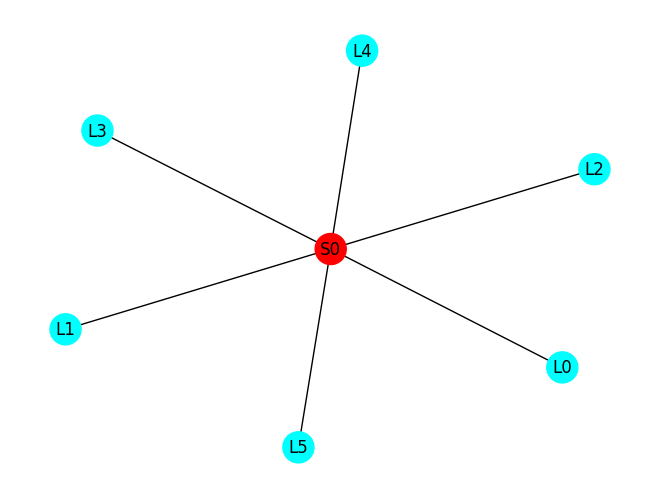

In [29]:
from neurd import neuron_visualizations as nviz
nviz.plot_soma_limb_concept_network(
    neuron_obj
)

In [30]:
multi_soma_split_parameters = dict()

In [31]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

In [32]:
_ = neuron_obj.calculate_multi_soma_split_suggestions(
    plot = True,
    store_in_obj = True,
    **multi_soma_split_parameters
)


# Step 4B: Multi Soma Split Execution

In [33]:
neuron_list = neuron_obj.multi_soma_split_execution(
    verbose = False,
)

No error limbs to processs so just returning the original neuron


In [34]:
n1 = neuron_list[0]
print(n1.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>, <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>, <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>, <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>, <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>, <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>, <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>, <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>, <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>, <trimesh.Trimesh(vertices.shape=(2419, 3), faces.shape=(4893, 3))>, <trimesh.Trimesh(vertices.shape=(1665, 3), faces.shape=(2568, 3))>, <trimesh.Trimesh(vertices.shape=(1619, 3), faces

# Step 5: Cell Typing

In [35]:
from neurd import neuron_pipeline_utils as npu

In [36]:
nviz.visualize_neuron(
    n1,
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [63]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

neuron_obj_axon = npu.cell_type_ax_dendr_stage(
    n1,
    mesh_decimated = mesh_decimated,
    plot_axon = False,
)


Number of segments: 3


Number of segments: 4


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 4


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 4


Number of segments: 4


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segme


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 3


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 4


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segme


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segme


Number of segments: 6


Number of segments: 6


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 5


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 4


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 1


Number of segments: 4


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segme

Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 3


Number of segments: 1


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segmen


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 5


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segme

Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segmen


Number of segments: 6


Number of segments: 3


Number of segments: 4


Number of segments: 4


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 4


Number of segments: 1


Number of segments: 4


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 1


Number of segments: 4


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segme


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 4


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 5


Number of segments: 2


Number of segments: 4


Number of segments: 4


Number of segments: 1


Number of segments: 3


Number of segments: 2


Number of segme


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 4


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 3


Number of segments: 1


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segme


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segme

Number of segments: 3


Number of segments: 4


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 5


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segmen

100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 2.1233935356140137
branches_touching_root = [16]
combining close nodes
combine_threshold = 1300
length of Graph = 13106
After combining close endpoints max(kept_branches_idx) = 230, len(kept_branches_idx) = 190
empty_indices % = 0.0
 conflict_indices % = 0.05154251788018087
Decomposing first pass: 19.99107027053833
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 1.33514404296875e-05
Total time for MAP sublimb processing 3.814697265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.1457672119140625e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.01563572883605957
sbv[0].reshape(-1,3) = [[ 552945.2  757231.5 1044509. ]]
closest_sk_pt_coord BEFORE = [ 552495.72569604  757785.38871569 1044811.89960749]
curren

In [64]:
nviz.plot_axon(
    neuron_obj_axon
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Autoproofreading Stage

About to do syn_density stats
syn_density_post = 0.8416129089432253
syn_density_head = 0.40833325223298456
syn_density_neck = 0.02100749850716319
syn_density_shaft = 0.3264915392988279
sk_length_synapse_density = 2284898.4129944285
About to do spine_density stats
postsyn_limb_branch = {'L0': array([ 0,  1,  3,  4,  6,  9, 10, 11, 12, 13, 14, 15, 17, 19, 23, 24, 25,
       27]), 'L1': array([0, 1, 4, 7]), 'L2': array([ 6,  7, 14]), 'L4': array([0]), 'L5': array([0])}
sk_length = 2186433.2393141887
# of spines = 992
Density = 0.45370696994670523
spine_density = 0.45370696994670523 (multiplier = 1000)
sk_length spine density = 2186433.2393141887
Done stats
Not apply_hand_made_low_rules
For model: LogisticRegression(class_weight={'excitatory': 1, 'inhibitory': 1.5}) 
with features: ['syn_density_shaft', 'spine_density']
pred_class = excitatory, pred_class_label = excitatory
Total time for e/i calculations = 0.13153767585754395
baylor_e_i = excitatory

*****Using v7 Filters!!!


Current nod

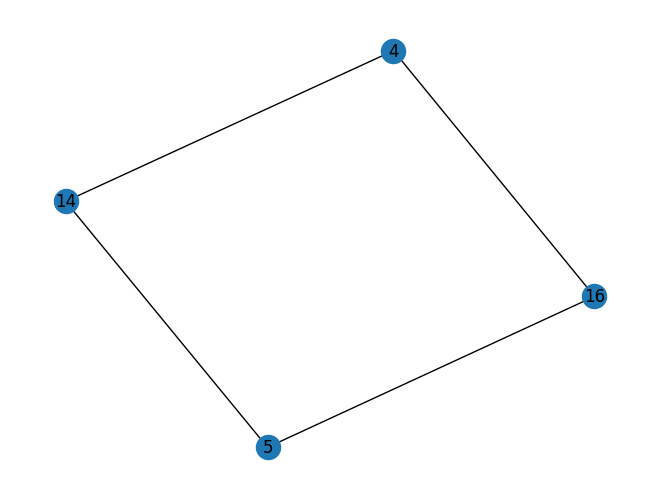

Performing global features query
Done with edge_df: 0.0009558200836181641
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  14     23.88   93.103610               0.520961              0.000335   
1   5  16     23.63    9.157586               0.051241              0.000335   
2  14   4     52.16   17.875322               0.172731              0.000000   
3  16   4     22.12   66.070703               0.638446              0.000000   

   n_synapses_diff definite_partner_width_delete definite_partner_sk_delete  
0                1                          True                       None  
1                1                         False                       None  
2                0                          None                       None  
3                0                          True                       None  
Afer Globa

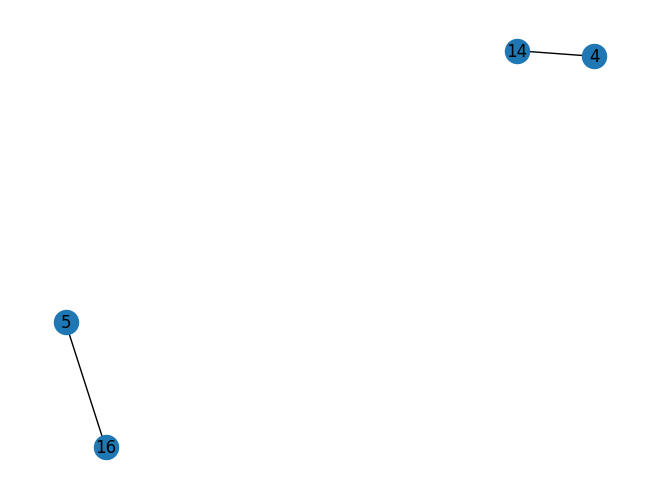

Performing node features query
Done with edge_df: 0.0006351470947265625
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  16     23.63    9.157586               0.051241              0.000335   
1  14   4     52.16   17.875322               0.172731              0.000000   

   n_synapses_diff definite_partner_width_delete definite_partner_sk_delete  \
0                1                         False                       None   
1                0                          None                       None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  16     23.63    9.157586               0.051241              0.000335   
1  14   4     52.16   17.875322               0.172731             

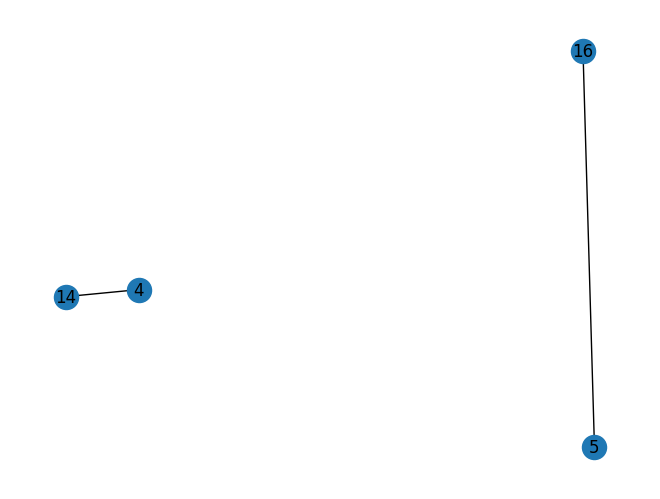

for upstream node 4, winning_node = 14, error_branches = [ 5 16]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (85.61135853746588) less than width_min(250)
Current node skip distance was 1911.3123702383687 but max skip distance was 2300.0
Current node skip distance was 1513.8828772852676 but max skip distance was 1513.8828772852676
Current node skip distance was 2147.9486754012596 but max skip distance was 2147.9486754012596
Current node skip distance was 1549.1878421611489 but max skip distance was 1549.1878421611489
Current node skip distance was 1447.7535882841676 but max skip distance was 1447.7535882841676
Current node skip distance was 1728.2191078946798 but max skip distance was 1911.3123702383687
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0018088817596435547
Performing Edge Query
After edge filter, # of rows = 2
Expo

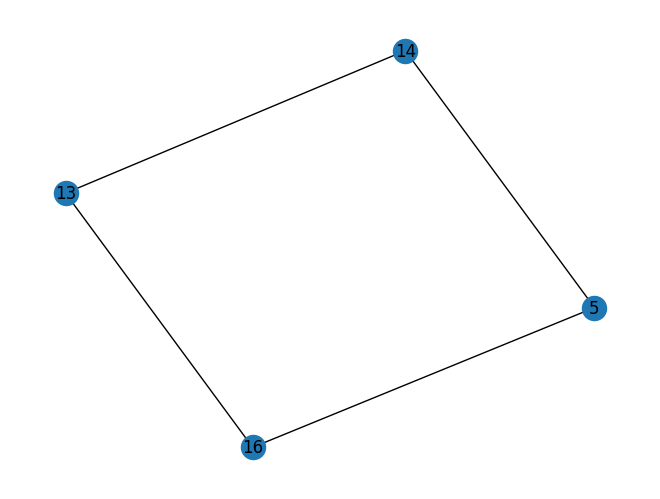

Performing global features query
Done with edge_df: 0.0010113716125488281
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  14     23.88   93.103610               0.520961              0.000335   
1   5  16     23.63    9.157586               0.051241              0.000335   
2  14  13     64.30   26.124601               0.233807              0.000000   
3  16  13     33.57   57.821423               0.517483              0.000000   

   n_synapses_diff definite_partner_width_delete definite_partner_sk_delete  
0                1                          True                       None  
1                1                         False                       None  
2                0                          None                       None  
3                0                          True                       None  
Afer Globa

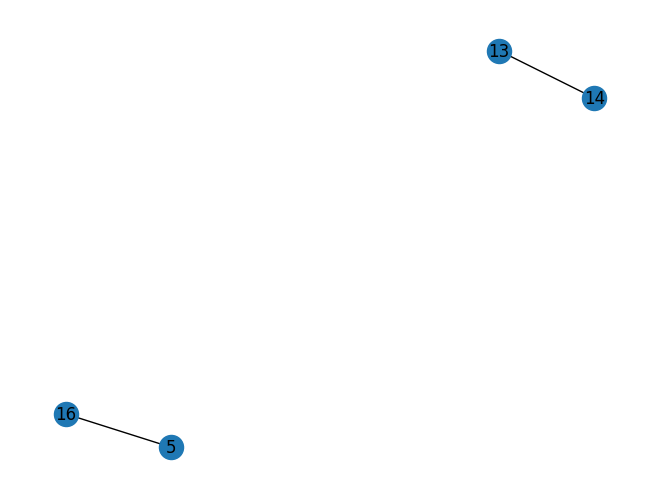

Performing node features query
Done with edge_df: 0.0006198883056640625
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  16     23.63    9.157586               0.051241              0.000335   
1  14  13     64.30   26.124601               0.233807              0.000000   

   n_synapses_diff definite_partner_width_delete definite_partner_sk_delete  \
0                1                         False                       None   
1                0                          None                       None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  16     23.63    9.157586               0.051241              0.000335   
1  14  13     64.30   26.124601               0.233807             

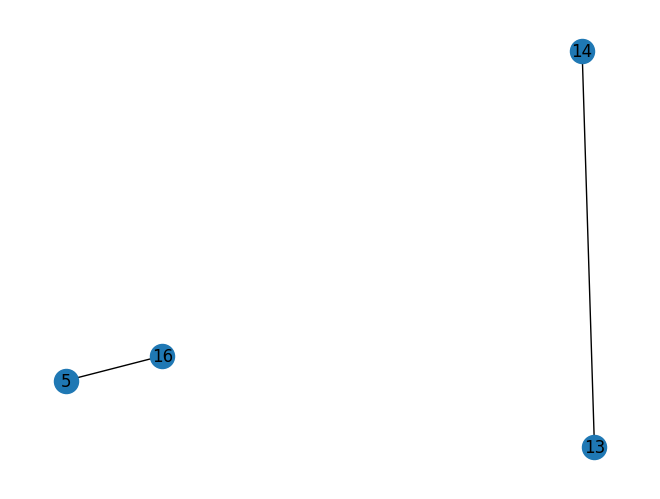

for upstream node 13, winning_node = 14, error_branches = [ 5 16]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (85.61135853746588) less than width_min(250)
Current node skip distance was 1523.3806605727739 but max skip distance was 1523.3806605727739
Current node skip distance was 1873.1557631602866 but max skip distance was 1873.1557631602866
Current node skip distance was 1704.7555018043995 but max skip distance was 2147.9486754012596
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0008003711700439453
Performing Edge Query
After edge filter, # of rows = 7
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   0   2     83.24   80.583125               1.102563              0.000201   
1   0   4     63.12   38.648896               0

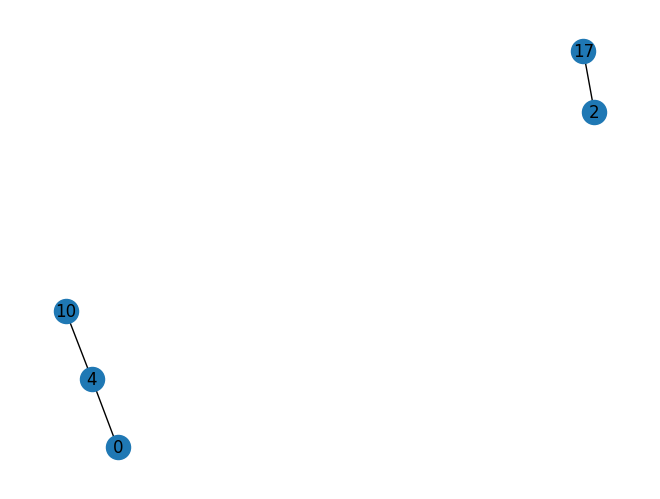

Performing global features query
Done with edge_df: 0.0006511211395263672
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  0   4     63.12   38.648896               0.528806              0.000000   
1  2  17      2.31   24.528869               0.189938              0.000201   
2  4  10     17.70   73.024394               0.653544              0.000000   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                0                        True                          None  
1                1                       False                          None  
2                0                       False                          None  
Afer Global query: 
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  2  17      2.31   24.528869               0.189938              0.

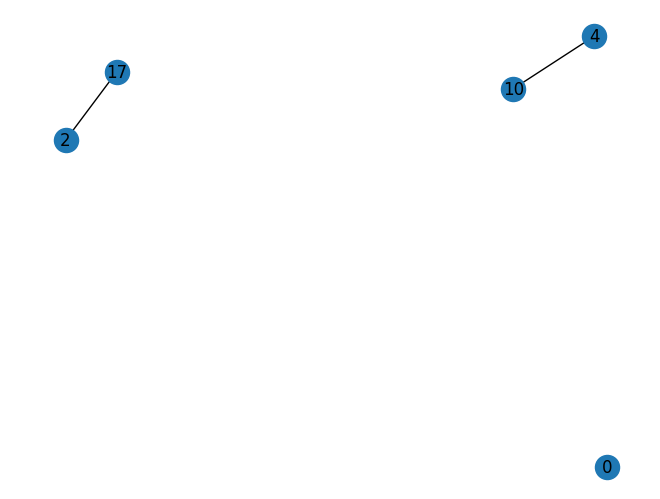

Performing node features query
Done with edge_df: 0.0005931854248046875
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  2  17      2.31   24.528869               0.189938              0.000201   
1  4  10     17.70   73.024394               0.653544              0.000000   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                1                       False                          None   
1                0                       False                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  2  17      2.31   24.528869               0.189938              0.000201   
1  4  10     17.70   73.024394               0.653544              0.

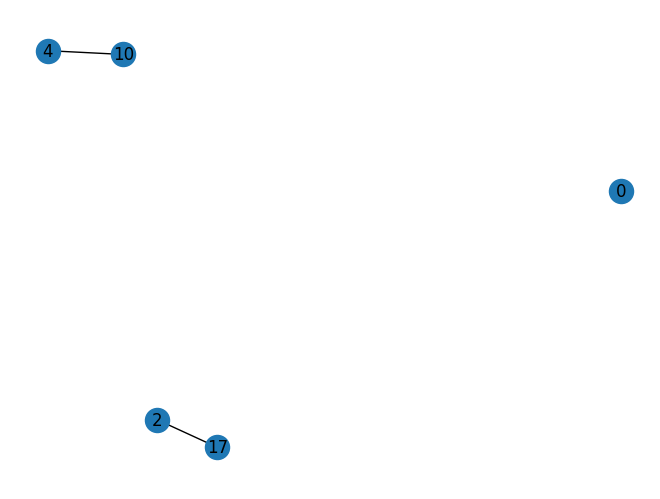

for upstream node 17, winning_node = 2, error_branches = [ 0  4 10]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1493.0541688036062 but max skip distance was 1493.0541688036062
Current node skip distance was 1780.438368687568 but max skip distance was 1780.438368687568
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0007877349853515625
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   55.640195               0.430847              0.000000   
1  17  21     70.64    0.727934               0.005637              0.000189   
2  17  19     56.33   18.163888               0.123308              0.000000 

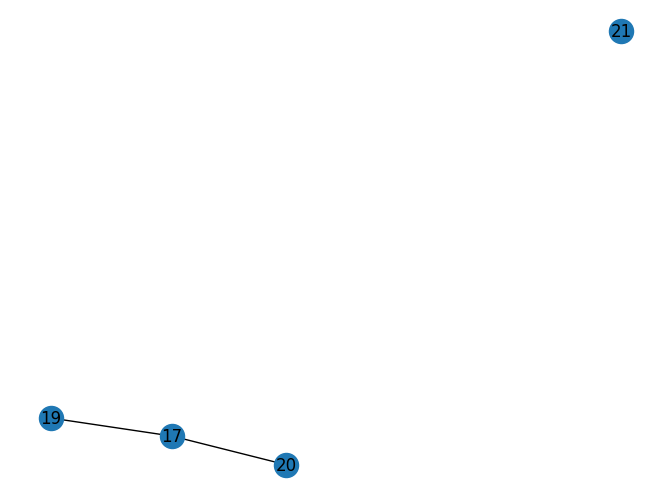

Performing global features query
Done with edge_df: 0.0007631778717041016
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   55.640195               0.430847                   0.0   
1  17  19     56.33   18.163888               0.123308                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_partner_width_delete  
0                0                       False                           True  
1                0                        True                          False  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   55.640195               0.430847                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_partner_width_delete  
0                0                       False             

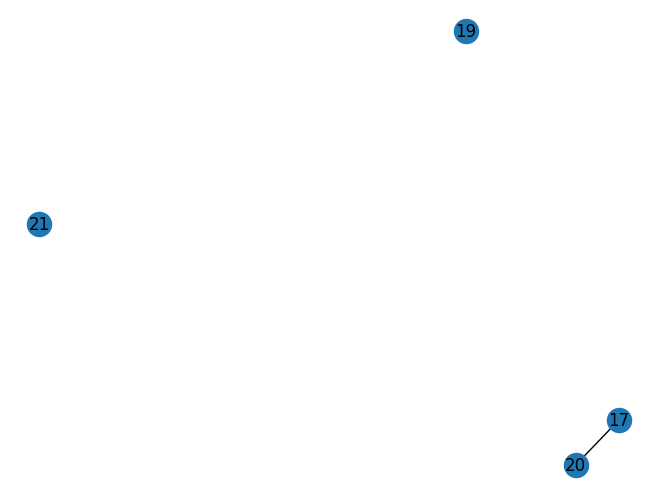

Performing node features query
Done with edge_df: 0.0005438327789306641
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   55.640195               0.430847                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_partner_width_delete  \
0                0                       False                           True   

  above_threshold_delete  
0                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   55.640195               0.430847                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_partner_width_delete  \
0                0                       False                           True   

  above_threshold_delete  
0                   None  


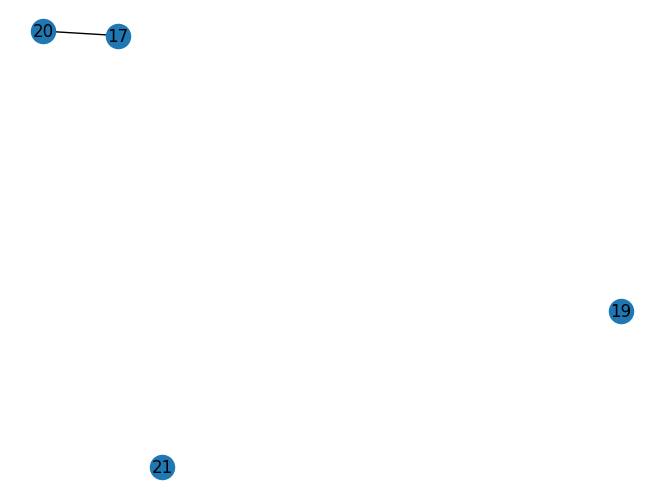

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1472.9213556462194 but max skip distance was 1472.9213556462194
Current node skip distance was 1707.788560665129 but max skip distance was 1750.095367673654
Current node skip distance was 1628.36603139084 but max skip distance was 1628.36603139084
Current node skip distance was 1480.048301990361 but max skip distance was 1480.048301990361
Current node skip distance was 1505.8889992953318 but max skip distance was 1505.8889992953318
Current node skip distance was 1727.5189646995595 but max skip distance was 1780.438368687568
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0013737678527832031
Performing Edge Query
After edge filter, # of rows = 9
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u   v  sk_angle  widt

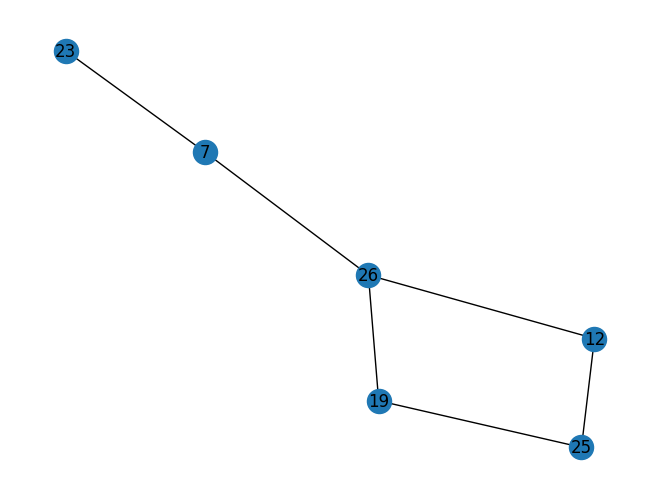

Performing global features query
Done with edge_df: 0.0008935928344726562
Performing Edge Query
After edge filter, # of rows = 3
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   7  23     13.03    8.120298               0.097445              0.000084   
1   7  26     45.19   13.405755               0.160872              0.000197   
2  12  26     29.39    2.465275               0.036544              0.000281   
3  12  25     43.29   67.143690               0.498822              0.000278   
4  19  26     59.91   77.379073               0.525298              0.000281   
5  19  25     32.65   12.700657               0.094355              0.000278   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                1                      False                          None  
1                1                       True                          None  
2     

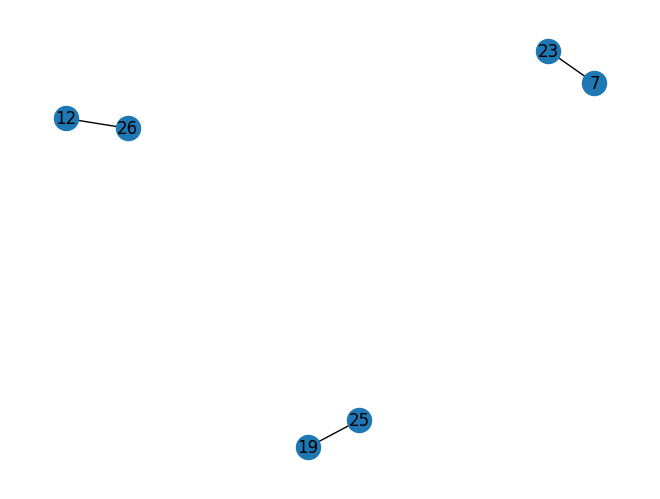

Performing node features query
Done with edge_df: 0.0006089210510253906
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   7  23     13.03    8.120298               0.097445              0.000084   
1  12  26     29.39    2.465275               0.036544              0.000281   
2  19  25     32.65   12.700657               0.094355              0.000278   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                1                      False                          None   
1                2                       None                          None   
2                1                       None                         False   

  above_threshold_delete  
0                   None  
1                   None  
2                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_di

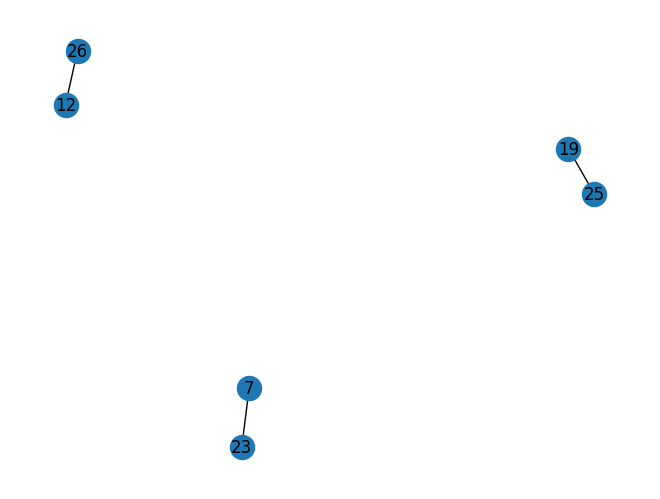

for upstream node 25, winning_node = 19, error_branches = [ 7 12 23 26]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1458.0255655002047 but max skip distance was 1458.0255655002047
Current node skip distance was 1473.9583068018837 but max skip distance was 1473.9583068018837
Current node skip distance was 1439.2097328140164 but max skip distance was 1439.2097328140164
Current node skip distance was 1665.7633897842265 but max skip distance was 1727.5189646995595
Current node skip distance was 1548.4889966432347 but max skip distance was 1548.4889966432347
Current node skip distance was 1373.696244750608 but max skip distance was 1373.696244750608
Current node skip distance was 2051.8343766422095 but max skip distance was 2051.8343766422095
Current node skip distance was 1404.8838081236074 but max skip distance was 1404.8838081236074
Current node skip distance was 1459.2028288115498 but max skip dist

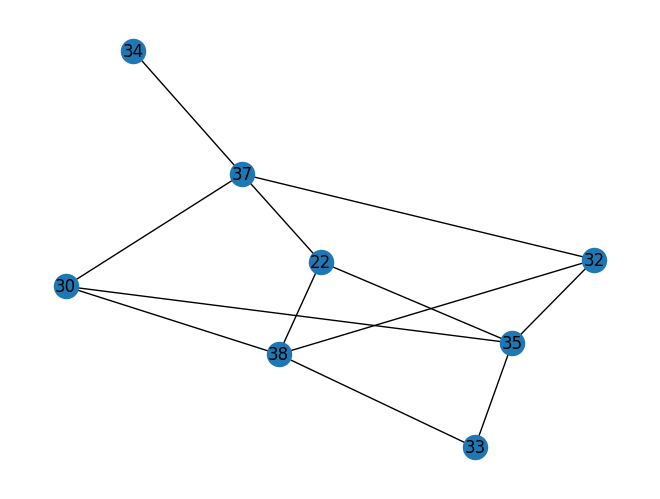

Performing global features query
Done with edge_df: 0.0006906986236572266
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   22  35     41.68   53.635734               0.484043              0.000000   
1   22  38     33.53   51.967919               0.468991              0.000000   
2   22  37     57.51   40.462742               0.267486              0.000197   
3   30  35     22.18   62.611100               0.522703              0.000000   
4   30  38     26.36   60.943285               0.508780              0.000000   
5   30  37     21.22   31.487376               0.208153              0.000197   
6   32  35     30.18   34.465245               0.376105              0.000000   
7   32  38     37.65   32.797430               0.357905              0.000000   
8   32  37     34.81   59.633230               0.394216              0.0

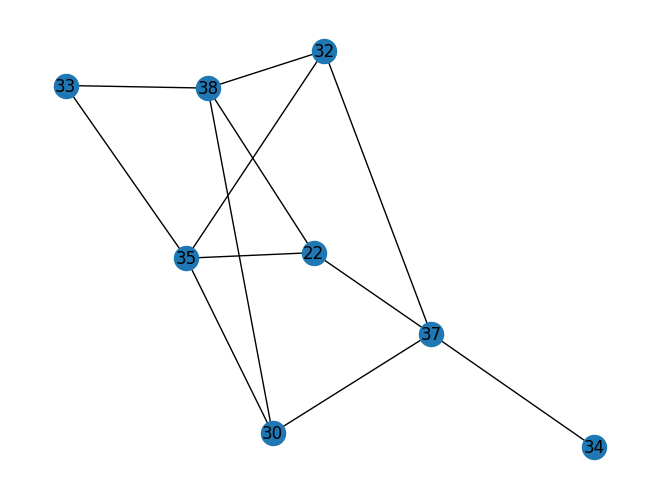

Performing node features query
Done with edge_df: 0.0013709068298339844
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   22  35     41.68   53.635734               0.484043              0.000000   
1   22  38     33.53   51.967919               0.468991              0.000000   
2   22  37     57.51   40.462742               0.267486              0.000197   
3   30  35     22.18   62.611100               0.522703              0.000000   
4   30  38     26.36   60.943285               0.508780              0.000000   
5   30  37     21.22   31.487376               0.208153              0.000197   
6   32  35     30.18   34.465245               0.376105              0.000000   
7   32  38     37.65   32.797430               0.357905              0.000000   
8   32  37     34.81   59.633230               0.394216              0.00019

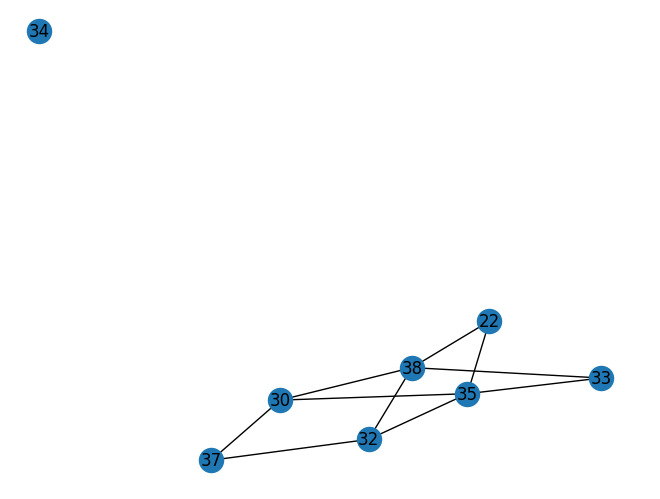

for upstream node 37, winning_node = None, error_branches = [22 30 32 33 34 35 38]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1411.8330370166711 but max skip distance was 1411.8330370166711
Current node skip distance was 1420.3496711923483 but max skip distance was 1420.3496711923483
Current node skip distance was 1567.6425816995368 but max skip distance was 1567.6425816995368
Current node skip distance was 1623.92418803835 but max skip distance was 2300.0
Current node skip distance was 1763.4735386570042 but max skip distance was 1763.4735386570042
Current node skip distance was 1806.1698114568526 but max skip distance was 2194.6320494015
Current node skip distance was 1522.4348593997124 but max skip distance was 1522.4348593997124
Current node skip distance was 1418.640985727487 but max skip distance was 1418.640985727487
Current node skip distance was 1540.8304622134242 but max skip distance was 1763.473538

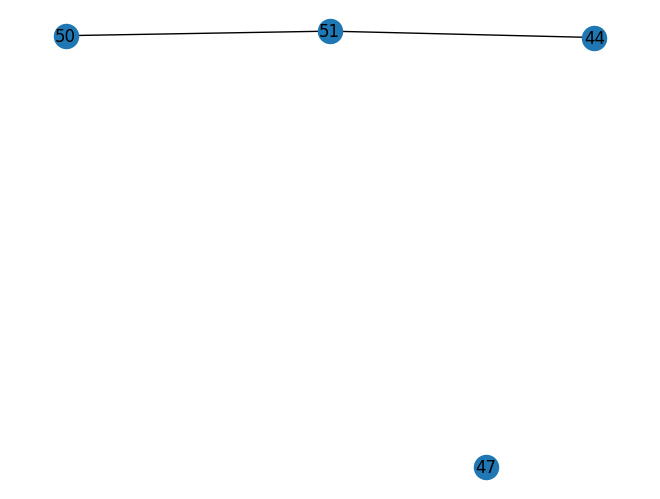

Performing global features query
Done with edge_df: 0.0005822181701660156
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  44  51     43.30  141.860633               0.497592              0.000244   
1  50  51     38.68  112.871744               0.395910              0.000012   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                5                       None                          None  
1                2                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  44  51     43.30  141.860633               0.497592              0.000244   
1  50  51     38.68  112.871744               0.395910              0.000012   

   n_synapses_diff definite_partner_sk_delete definite_partner_wi

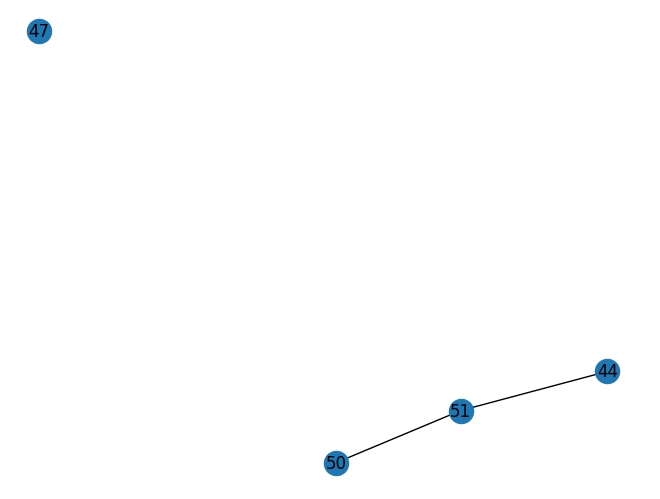

Performing node features query
Done with edge_df: 0.0006995201110839844
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  44  51     43.30  141.860633               0.497592              0.000244   
1  50  51     38.68  112.871744               0.395910              0.000012   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                5                       None                          None   
1                2                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  44  51     43.30  141.860633               0.497592              0.000244   
1  50  51     38.68  112.871744               0.395910             

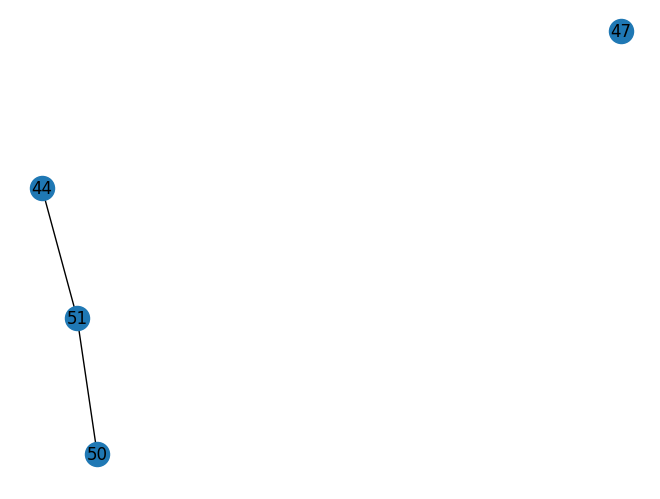

for upstream node 51, winning_node = None, error_branches = [44 47 50]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1384.062406158812 but max skip distance was 1384.062406158812
Current node skip distance was 1393.3073677849236 but max skip distance was 1393.3073677849236
Current node skip distance was 1823.3985698499866 but max skip distance was 2300.0
Current node skip distance was 2047.7482295822465 but max skip distance was 2047.7482295822465
Current node skip distance was 1572.2757039727346 but max skip distance was 2047.7482295822465
Current node skip distance was 1925.3633354937758 but max skip distance was 1925.3633354937758
Current node skip distance was 2219.6456115873207 but max skip distance was 2300.0
Current node skip distance was 2068.223850311619 but max skip distance was 2219.6456115873207
Current node skip distance was 1606.498192758714 but max skip distance was 1606.498192758714
Current node s

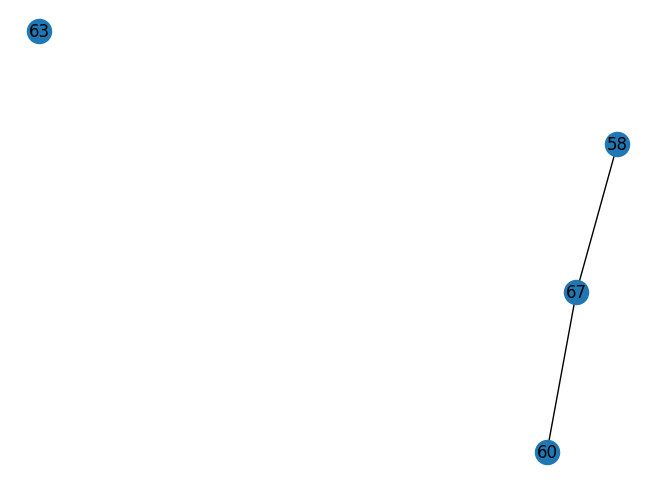

Performing global features query
Done with edge_df: 0.000698089599609375
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  58  67     16.34   32.942409               0.252842                   0.0   
1  60  67     21.11   26.821608               0.205863                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                0                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  58  67     16.34   32.942409               0.252842                   0.0   
1  60  67     21.11   26.821608               0.205863                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_wid

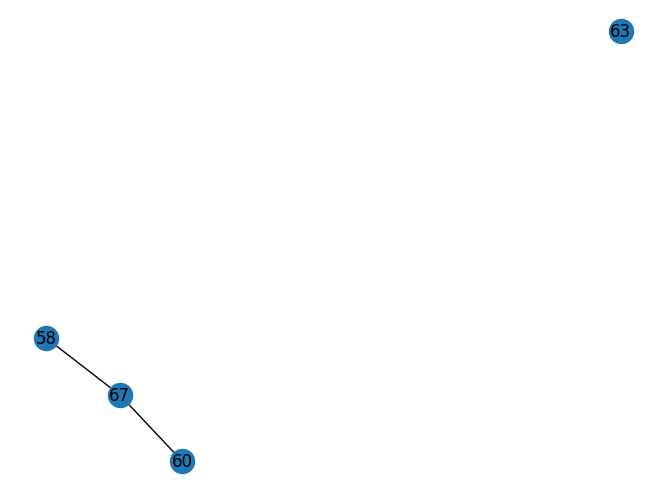

Performing node features query
Done with edge_df: 0.0007646083831787109
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  58  67     16.34   32.942409               0.252842                   0.0   
1  60  67     21.11   26.821608               0.205863                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                0                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  58  67     16.34   32.942409               0.252842                   0.0   
1  60  67     21.11   26.821608               0.205863             

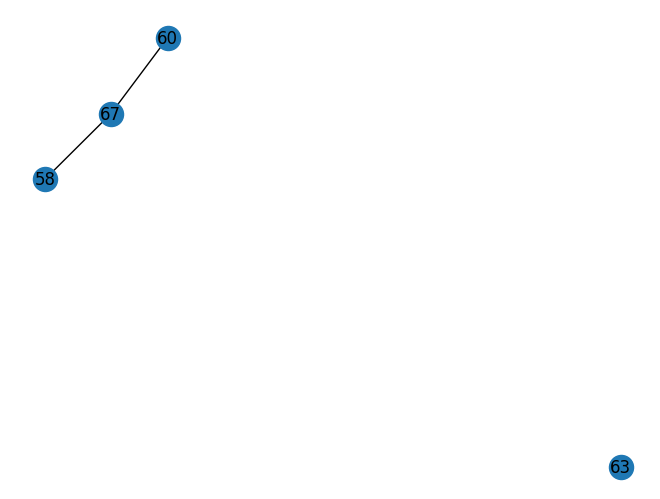

for upstream node 67, winning_node = None, error_branches = [58 60 63]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1953.9356343413888 but max skip distance was 1953.9356343413888
Current node skip distance was 1662.2622878608922 but max skip distance was 1953.9356343413888
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1450.8454232028087 but max skip distance was 1450.8454232028087
Current node skip distance was 1527.1977673222736 but max skip distance was 1527.1977673222736
Current node skip distance was 1777.2547339923053 but max skip distance was 1777.2547339923053
Current node skip distance was 1527.536106730201 but max skip distance was 1735.5251222642733
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0009284019470214844
Pe

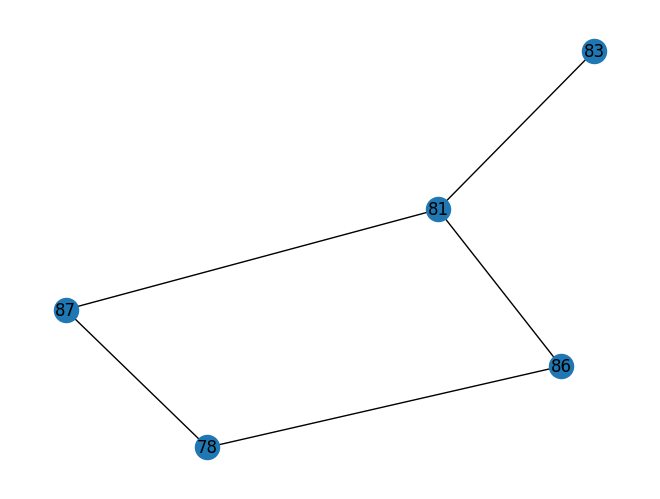

Performing global features query
Done with edge_df: 0.0010306835174560547
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  81  83     16.49   52.715658               0.628987                   0.0   
1  81  86     23.95    3.354177               0.040021                   0.0   
2  81  87     49.84   11.469208               0.136847                   0.0   
3  86  78     51.57    0.555883               0.006418                   0.0   
4  87  78     33.58   14.267503               0.164735                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                0                       None                          None  
2                0                       None                          None  
3       

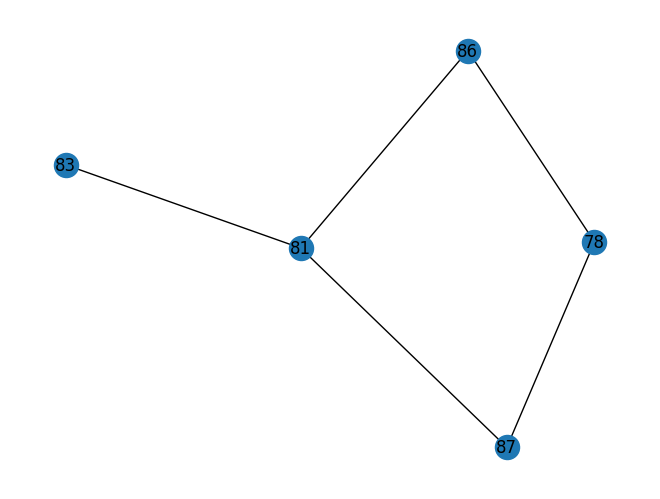

Performing node features query
Done with edge_df: 0.0008783340454101562
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  81  83     16.49   52.715658               0.628987                   0.0   
1  81  86     23.95    3.354177               0.040021                   0.0   
2  81  87     49.84   11.469208               0.136847                   0.0   
3  86  78     51.57    0.555883               0.006418                   0.0   
4  87  78     33.58   14.267503               0.164735                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                0                       None                          None   
2                0                       None                          None   
3       

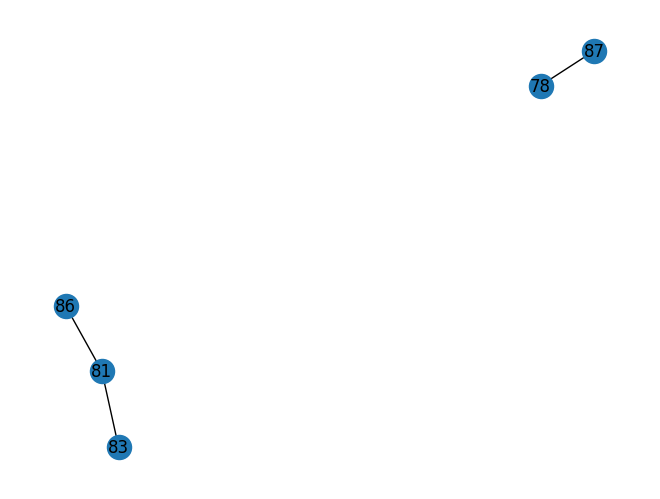

for upstream node 78, winning_node = 87, error_branches = [81 83 86]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1797.9691298208604 but max skip distance was 1823.3985698499866
Current node skip distance was 1536.0456374197795 but max skip distance was 1536.0456374197795
Current node skip distance was 1515.8765468973097 but max skip distance was 1515.8765468973097
Current node skip distance was 2109.4034330471254 but max skip distance was 2109.4034330471254
Current node skip distance was 1735.5251222642733 but max skip distance was 1735.5251222642733
Current node skip distance was 1339.6166476025069 but max skip distance was 2109.4034330471254
Current node skip distance was 1529.8522860692512 but max skip distance was 1529.8522860692512
Current node skip distance was 1468.0881790702963 but max skip distance was 1741.326341696974
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage 

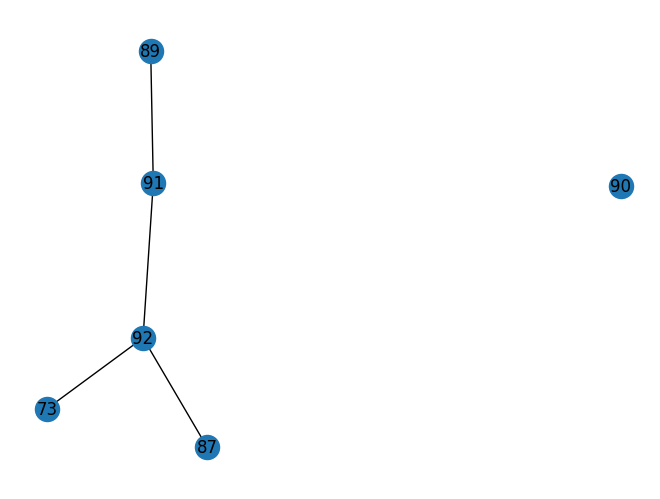

Performing global features query
Done with edge_df: 0.0008401870727539062
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  73  92     10.84    5.038227               0.073871              0.000174   
1  89  91     64.64   47.794340               0.346541              0.000000   
2  91  92     49.21   16.882853               0.187329              0.000000   
3  92  87     12.25    0.899966               0.012441              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                2                       None                          None  
1                0                       None                          None  
2                0                       None                          None  
3                0                       None                          None  
Afer Globa

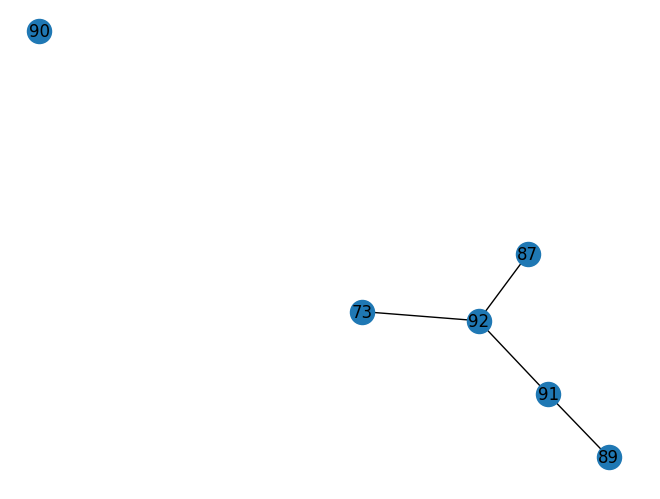

Performing node features query
Done with edge_df: 0.0008409023284912109
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  73  92     10.84    5.038227               0.073871              0.000174   
1  89  91     64.64   47.794340               0.346541              0.000000   
2  91  92     49.21   16.882853               0.187329              0.000000   
3  92  87     12.25    0.899966               0.012441              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                2                       None                          None   
1                0                       None                          None   
2                0                       None                          None   
3                0                       None                          None   

  above_

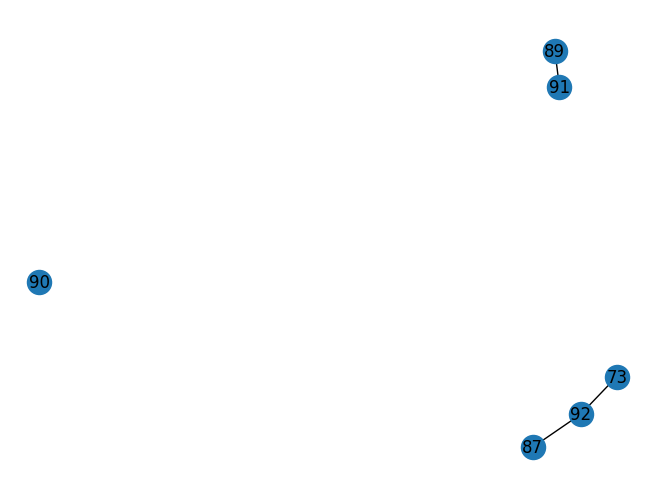

for upstream node 87, winning_node = None, error_branches = [73 89 90 91 92]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1549.8560882657166 but max skip distance was 1777.2547339923053
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0007946491241455078
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  77    112.54   27.598187               0.232029              0.000000   
1  69  82     40.65   71.876842               0.604297              0.000248   
2  69  88     77.03   26.977488               0.293344              0.000112   
3  77  82    101.75   44.278655               0.302159              0.000248   
4  77  88     5

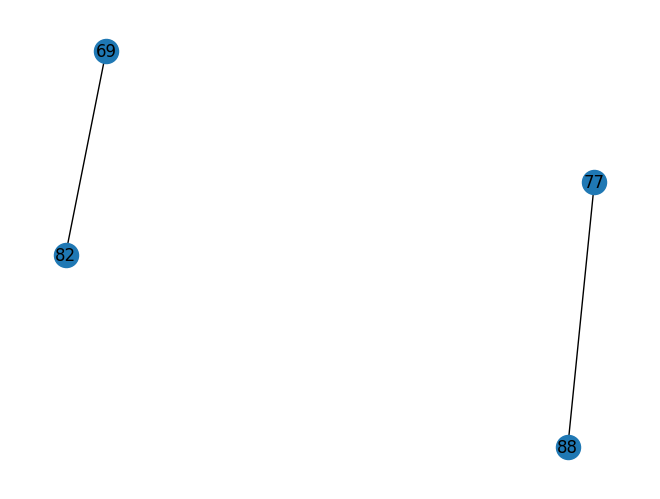

Performing global features query
Done with edge_df: 0.0006272792816162109
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  82     40.65   71.876842               0.604297              0.000248   
1  77  88     58.28   54.575675               0.593437              0.000112   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                1                      False                          None  
1                7                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  82     40.65   71.876842               0.604297              0.000248   
1  77  88     58.28   54.575675               0.593437              0.000112   

   n_synapses_diff definite_partner_sk_delete definite_partner_wi

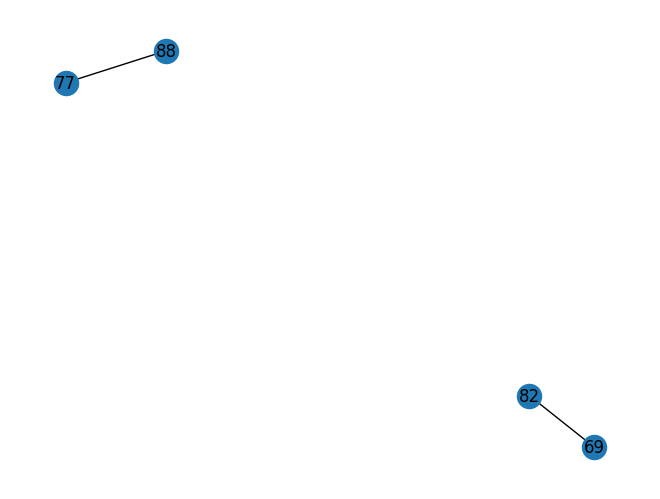

Performing node features query
Done with edge_df: 0.0005879402160644531
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  82     40.65   71.876842               0.604297              0.000248   
1  77  88     58.28   54.575675               0.593437              0.000112   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                1                      False                          None   
1                7                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  82     40.65   71.876842               0.604297              0.000248   
1  77  88     58.28   54.575675               0.593437             

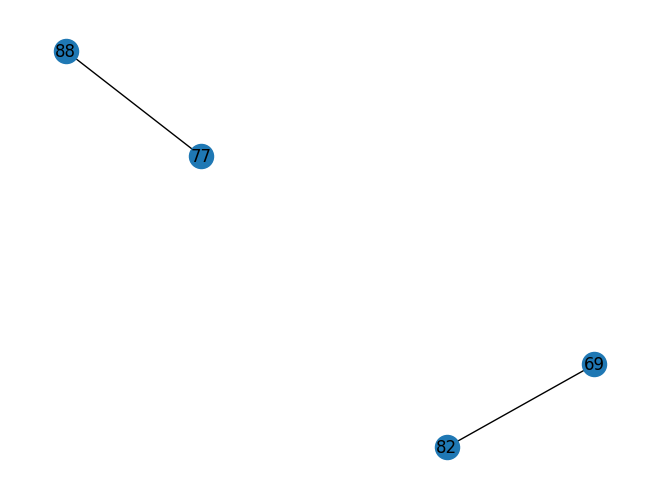

for upstream node 88, winning_node = 77, error_branches = [69 82]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (146.54113615815348) less than width_min(250)
Current node skip distance was 1741.326341696974 but max skip distance was 1741.326341696974
Current node skip distance was 1579.1971264491701 but max skip distance was 1579.1971264491701
Current node skip distance was 1542.1832582246798 but max skip distance was 1542.1832582246798
Current node skip distance was 1471.8380360714896 but max skip distance was 1471.8380360714896
Current node skip distance was 1529.1076968233356 but max skip distance was 1765.4448116681824
Current node skip distance was 2280.921113124413 but max skip distance was 2280.921113124413
Current node skip distance was 1506.6702597792355 but max skip distance was 2280.921113124413
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 

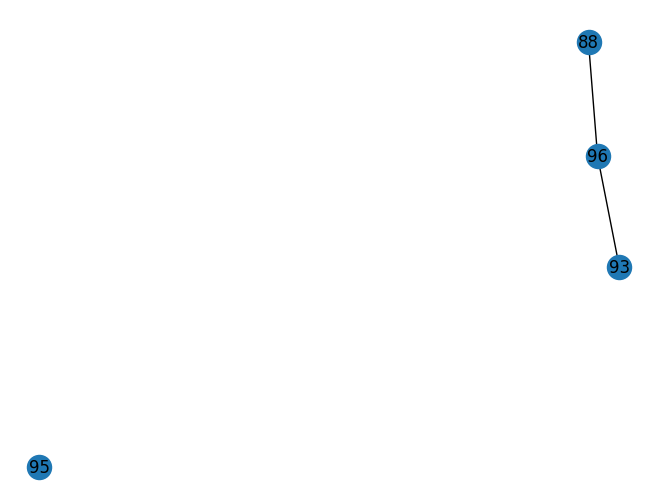

Performing global features query
Done with edge_df: 0.0005972385406494141
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  96     14.33   10.364599               0.127016              0.000091   
1  93  96     50.91    5.384985               0.065992              0.000020   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                6                       False                          None  
1                1                        True                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  96     14.33   10.364599               0.127016              0.000091   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                6                       False                 

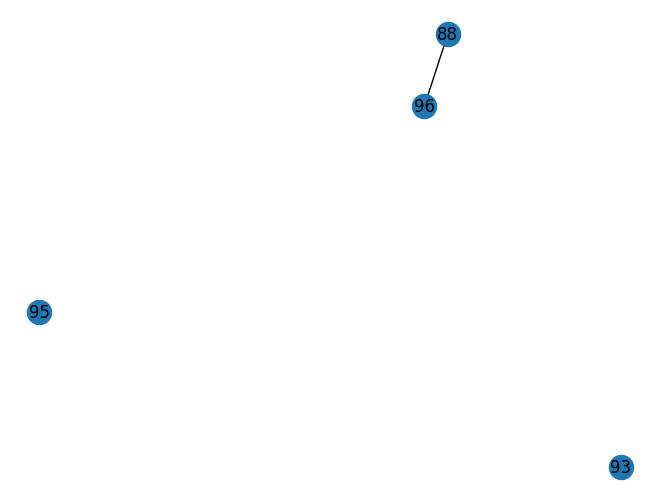

Performing node features query
Done with edge_df: 0.0006568431854248047
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  96     14.33   10.364599               0.127016              0.000091   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                6                       False                          None   

  above_threshold_delete  
0                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  96     14.33   10.364599               0.127016              0.000091   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                6                       False                          None   

  above_threshold_delete  
0                   None  


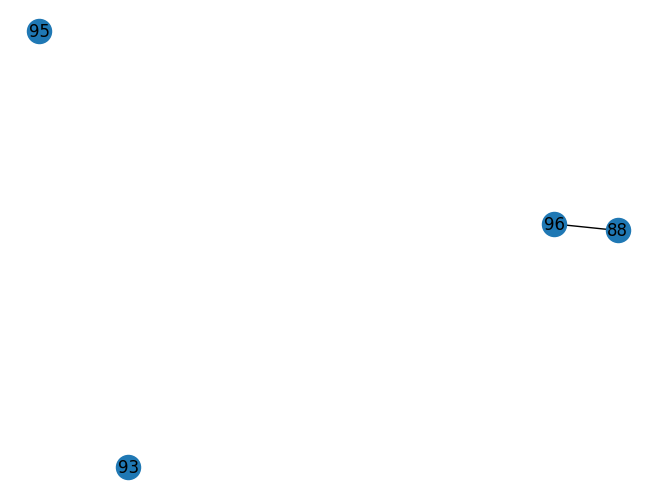

for upstream node 96, winning_node = 88, error_branches = [93 95]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (97.55504075401218) less than width_min(250)
Current node skip distance was 1640.7114955877244 but max skip distance was 1987.0475794936974
Current node skip distance was 1529.5449883497408 but max skip distance was 1529.5449883497408
Current node skip distance was 1714.031247526074 but max skip distance was 1714.031247526074
Current node skip distance was 1987.0475794936974 but max skip distance was 1987.0475794936974
Current node skip distance was 1601.2661660679046 but max skip distance was 1793.1204510958955
Current node skip distance was 1474.7194784132298 but max skip distance was 1521.950905352955
Current node skip distance was 1517.7243823465901 but max skip distance was 1517.7243823465901
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1540.2111837856035 but max skip distance was 1540.2111

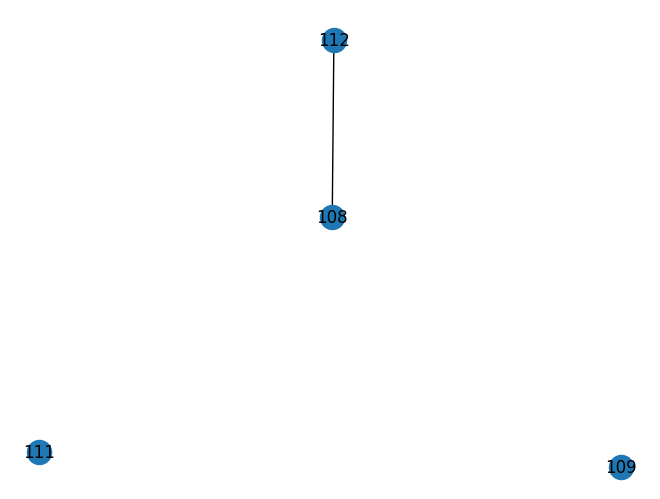

Performing global features query
Done with edge_df: 0.0006639957427978516
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  112  108     41.37   24.027648                0.28658   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000124                1                       False   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  112  108     41.37   24.027648                0.28658   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000124                1                       False   

  definite_partner_width_delete  
0                          None  


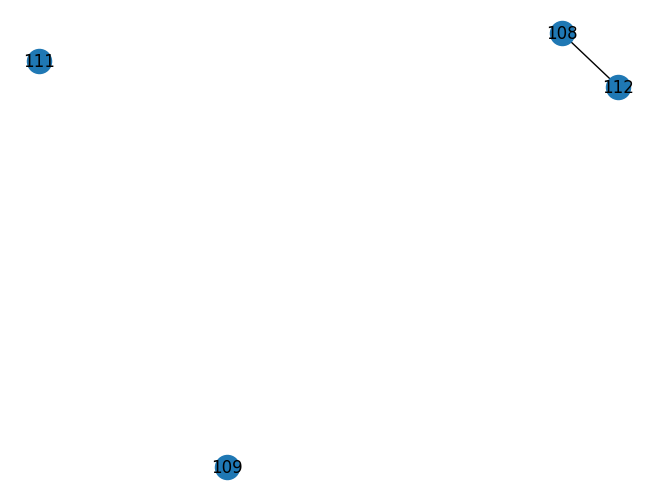

Performing node features query
Done with edge_df: 0.0006558895111083984
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  112  108     41.37   24.027648                0.28658   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000124                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  112  108     41.37   24.027648                0.28658   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000124                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


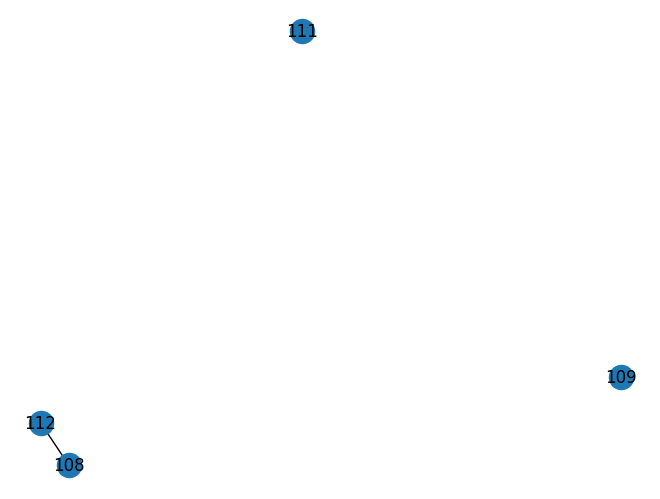

for upstream node 108, winning_node = 112, error_branches = [109 111]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (59.81510376025246) less than width_min(250)
Current node skip distance was 1558.5661985162365 but max skip distance was 1558.5661985162365
Current node skip distance was 1781.239046371689 but max skip distance was 1781.239046371689
Current node skip distance was 1463.7042418842564 but max skip distance was 1463.7042418842564
Current node skip distance was 1415.8962656677181 but max skip distance was 1415.8962656677181
Current node skip distance was 1504.0873190870434 but max skip distance was 1504.0873190870434
Current node skip distance was 1747.6632944768603 but max skip distance was 1747.6632944768603
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0007500648498535156
Performing Edge Query
After edge filter, # o

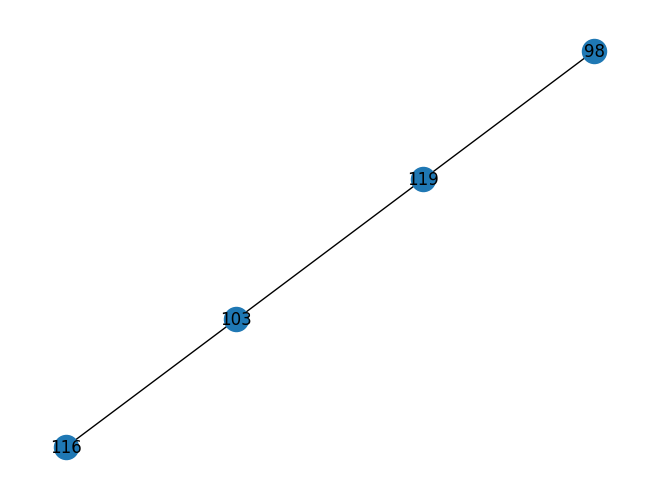

Performing global features query
Done with edge_df: 0.0008614063262939453
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0   98  119     51.47    6.878108               0.078976   
1  103  119     40.55   24.091191               0.230971   
2  103  116     41.01   35.135311               0.251976   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000075                1                       None   
1              0.000109                2                       None   
2              0.000000                0                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0   98  119     51.47    6.878108               0.078976   

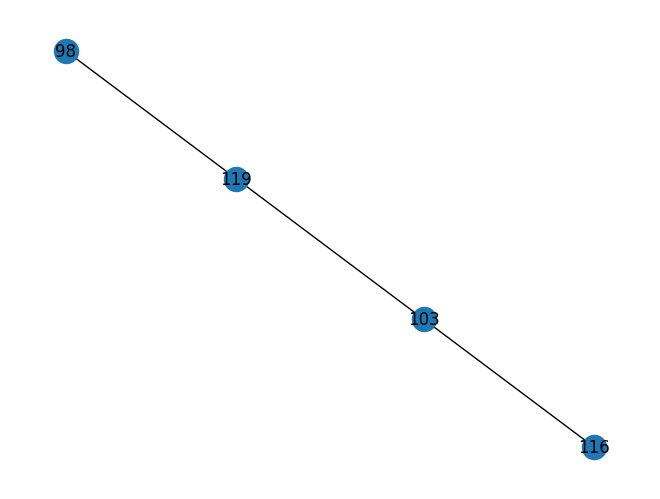

Performing node features query
Done with edge_df: 0.0008990764617919922
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0   98  119     51.47    6.878108               0.078976   
1  103  119     40.55   24.091191               0.230971   
2  103  116     41.01   35.135311               0.251976   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000075                1                       None   
1              0.000109                2                       None   
2              0.000000                0                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   True  
1                          None                   None  
2                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff

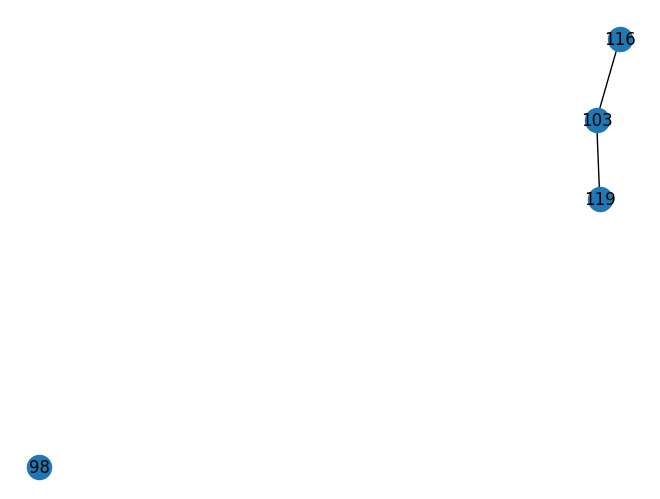

for upstream node 116, winning_node = None, error_branches = [ 98 103 119]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1679.734858574324 but max skip distance was 2197.438384984916
Current node skip distance was 1665.7008418710207 but max skip distance was 2159.3538209715534
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0009467601776123047
Performing Edge Query
After edge filter, # of rows = 5
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  120     94.45   27.479371               0.327749   
1  108  122     75.40   21.275256               0.253752   
2  108  118     56.28   35.925450               0.299958   
3  120  122    159.93    6.204114               0.110073   
4  120  118    140.15   

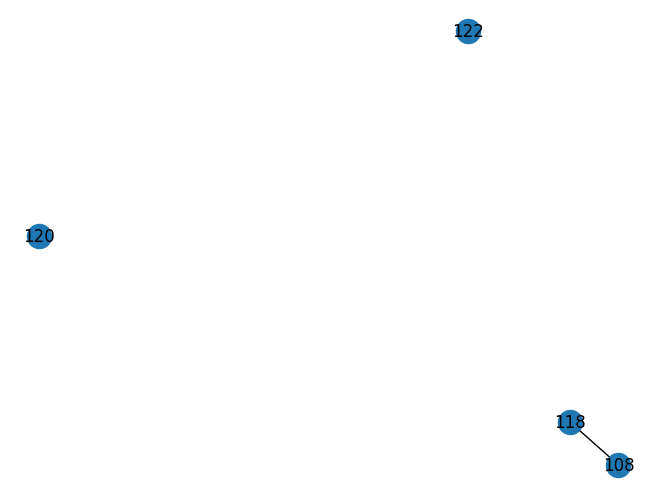

Performing global features query
Done with edge_df: 0.000579833984375
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  118     56.28    35.92545               0.299958   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000124                1                       None   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  118     56.28    35.92545               0.299958   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000124                1                       None   

  definite_partner_width_delete  
0                          None  


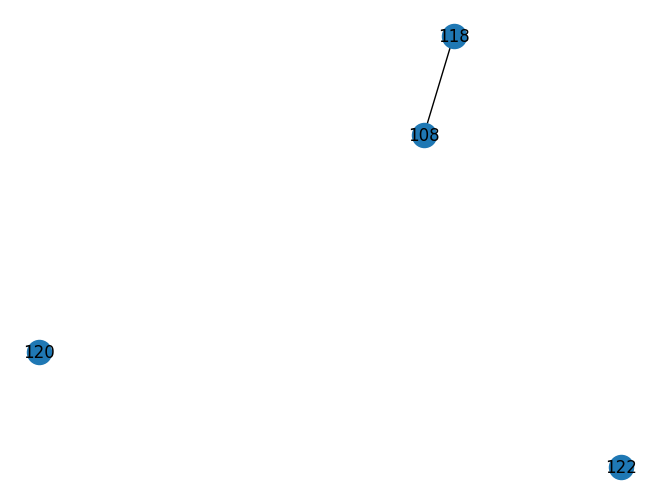

Performing node features query
Done with edge_df: 0.0005965232849121094
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  118     56.28    35.92545               0.299958   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000124                1                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  118     56.28    35.92545               0.299958   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000124                1                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


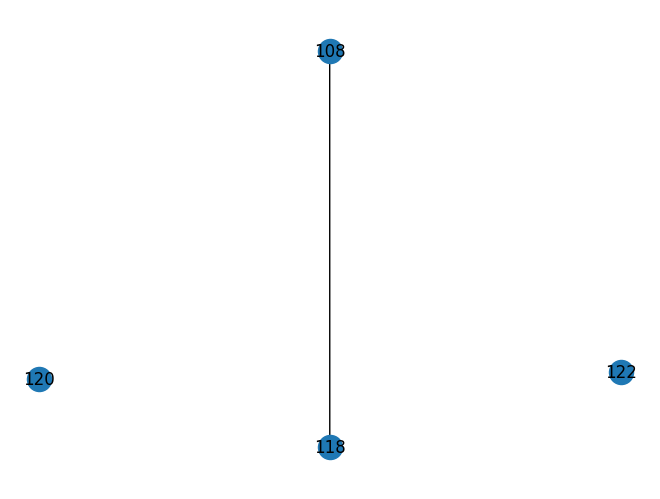

for upstream node 118, winning_node = 108, error_branches = [120 122]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (110.62623380209585) less than width_min(250)
Current node skip distance was 1500.8862043500594 but max skip distance was 1558.868122651933
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0008511543273925781
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   19.842334               0.210801   
1  149  152     73.40   13.927533               0.147963   
2  149  119     96.83   13.915660               0.173485   
3  151  152    115.64    5.914800               0.079622   
4  151  119     68.71    5.926673               0.073887   
5  152  119     12.83    0.011873

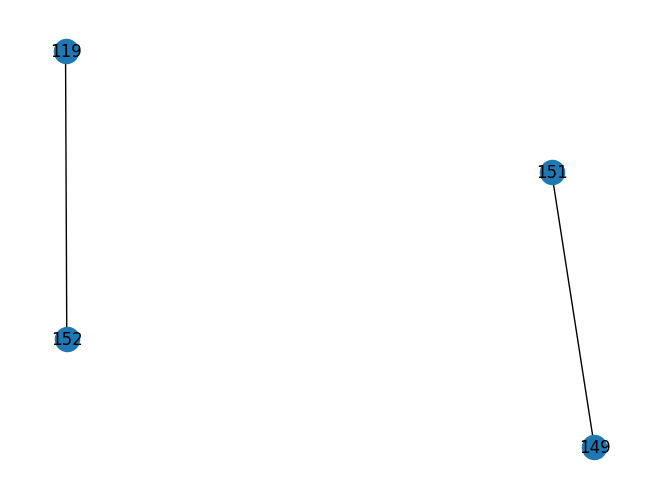

Performing global features query
Done with edge_df: 0.0006213188171386719
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   19.842334               0.210801   
1  152  119     12.83    0.011873               0.000148   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000000                0                       False   
1              0.000016                2                       False   

  definite_partner_width_delete  
0                          None  
1                         False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   19.842334               0.210801   
1  152  119     12.83    0.011873               0.000148   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000000     

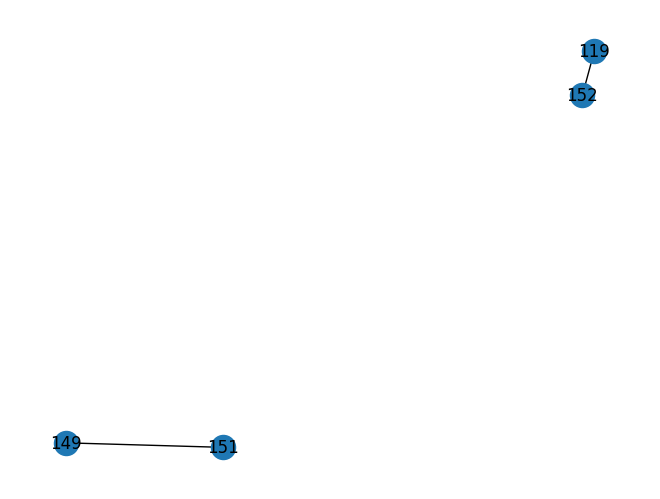

Performing node features query
Done with edge_df: 0.00066375732421875
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   19.842334               0.210801   
1  152  119     12.83    0.011873               0.000148   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000000                0                       False   
1              0.000016                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                         False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   19.842334               0.210801   
1  152  119     12.83    0.011873               0.000148   

   synapse_density_diff  n_synapses_dif

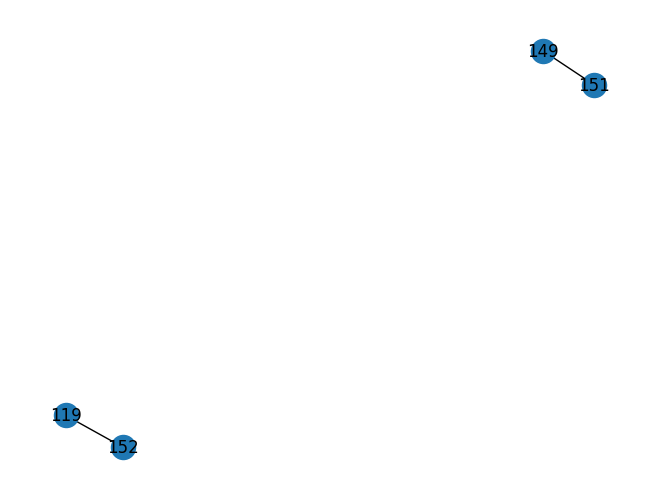

for upstream node 119, winning_node = 152, error_branches = [149 151]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (86.65776251469174) less than width_min(250)
Current node skip distance was 1401.514089053542 but max skip distance was 1679.734858574324
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0010428428649902344
Performing Edge Query
After edge filter, # of rows = 3
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  117  134     50.97   19.869498               0.207431   
1  117  135     26.31   21.426044               0.223681   
2  117  120    129.50   39.424882               0.699477   
3  134  135    107.21    1.556546               0.020503   
4  134  120     66.14   19.555384               0.346952   
5  135  120     38.50   17.998838  

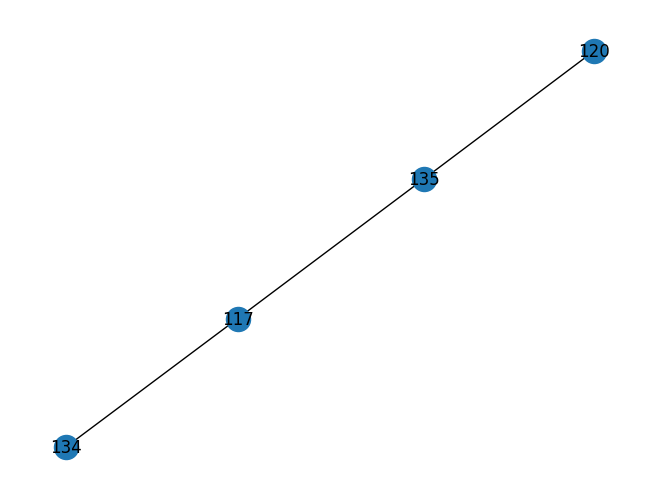

Performing global features query
Done with edge_df: 0.0005908012390136719
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  117  134     50.97   19.869498               0.207431   
1  117  135     26.31   21.426044               0.223681   
2  135  120     38.50   17.998838               0.319336   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000119                1                       None   
1              0.000032                0                       None   
2              0.000086                1                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  117  134     50.97   19.869498               0.207431   

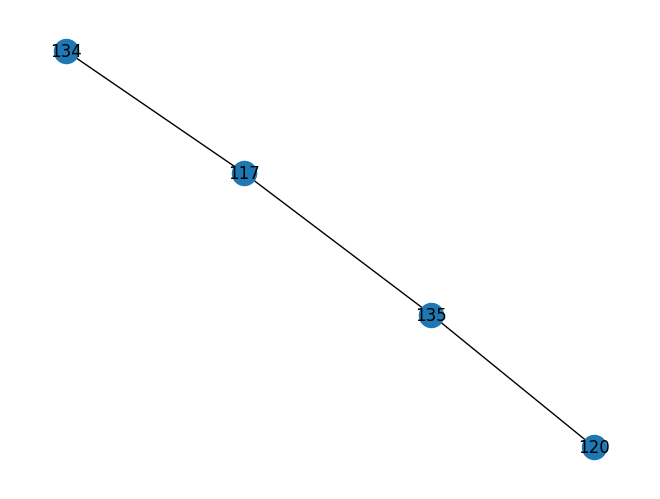

Performing node features query
Done with edge_df: 0.0007169246673583984
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  117  134     50.97   19.869498               0.207431   
1  117  135     26.31   21.426044               0.223681   
2  135  120     38.50   17.998838               0.319336   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000119                1                       None   
1              0.000032                0                       None   
2              0.000086                1                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   True  
1                          None                   None  
2                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff

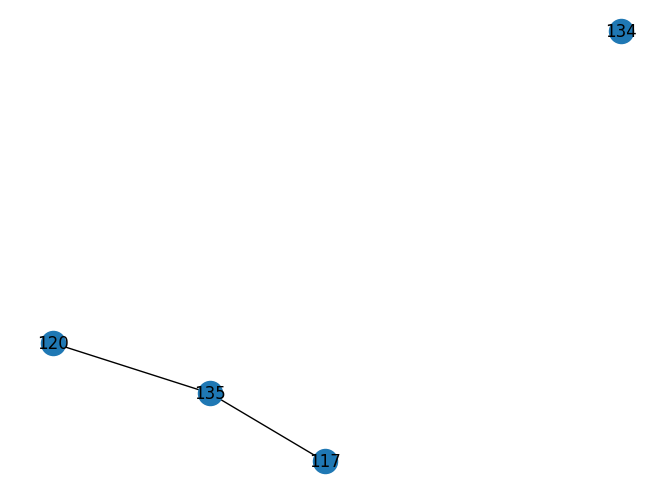

for upstream node 120, winning_node = None, error_branches = [117 134 135]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 2222.4913642393867 but max skip distance was 2222.4913642393867
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0008795261383056641
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  123     76.31    7.209715               0.048880   
1  110  124     29.09   86.029616               0.583262   
2  110  121     82.29  145.849086               0.497191   
3  123  124     83.10   78.819902               0.561845   
4  123  121     26.58  153.058800               0.521768   
5  124  121    122.22  231.878702               0.790460 

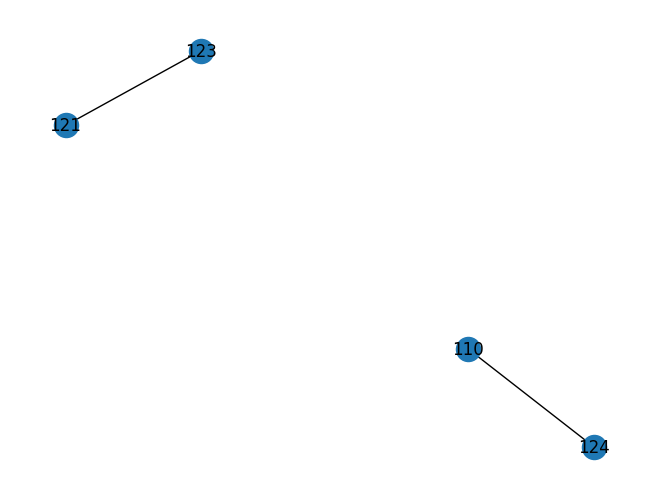

Performing global features query
Done with edge_df: 0.0006086826324462891
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  124     29.09   86.029616               0.583262   
1  123  121     26.58  153.058800               0.521768   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000107                1                       False   
1              0.000000                0                       False   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  124     29.09   86.029616               0.583262   
1  123  121     26.58  153.058800               0.521768   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000107     

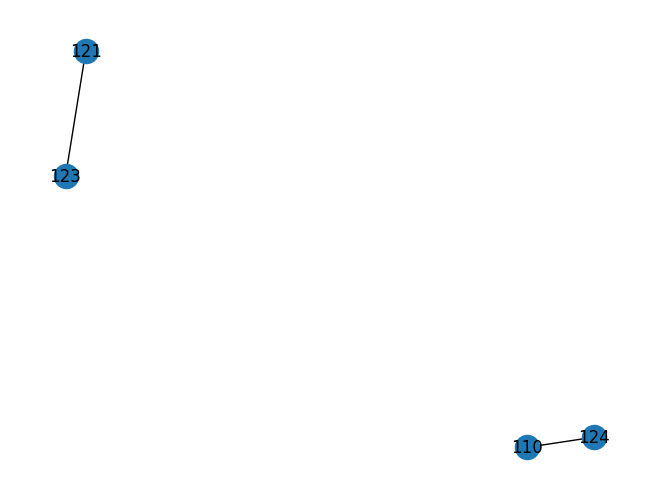

Performing node features query
Done with edge_df: 0.0006480216979980469
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  124     29.09   86.029616               0.583262   
1  123  121     26.58  153.058800               0.521768   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000107                1                       False   
1              0.000000                0                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  124     29.09   86.029616               0.583262   
1  123  121     26.58  153.058800               0.521768   

   synapse_density_diff  n_synapses_d

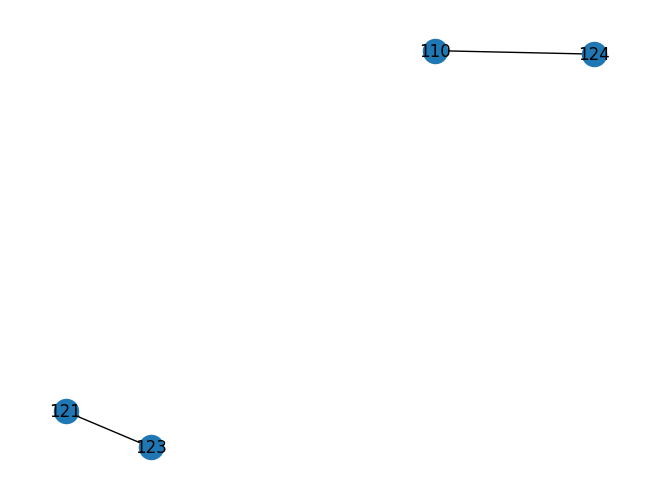

for upstream node 121, winning_node = 123, error_branches = [110 124]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (140.28765652185325) less than width_min(250)
Current node skip distance was 1427.364565567501 but max skip distance was 1427.364565567501
Current node skip distance was 1751.1985688410546 but max skip distance was 2088.8669277195713
Current node skip distance was 1422.7823118140598 but max skip distance was 1422.7823118140598
Current node skip distance was 1451.9504876031956 but max skip distance was 1451.9504876031956
Current node skip distance was 2088.8669277195713 but max skip distance was 2088.8669277195713
Current node skip distance was 1556.065657251308 but max skip distance was 1556.065657251308
Current node skip distance was 1550.1241718840056 but max skip distance was 2142.1063878645527
Current node skip distance was 1449.235144763992 but max skip distance was 1449.235144763992
Current node skip distance was 1906.2663347269172 but max

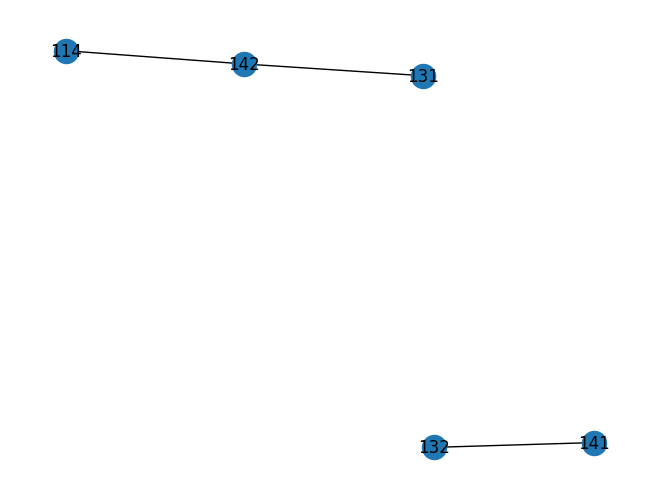

Performing global features query
Done with edge_df: 0.0019195079803466797
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   
1  131  142     14.97   14.582371               0.215027   
2  141  132      6.99   69.602713               0.392119   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0                   0.0                0                       None   
1                   0.0                0                       None   
2                   0.0                0                      False   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   

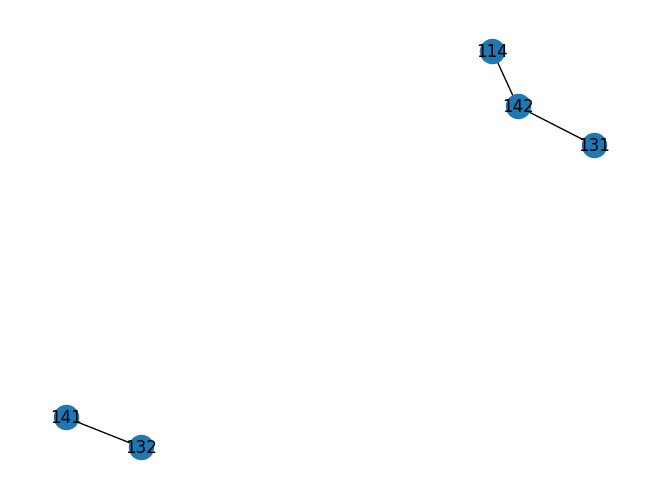

Performing node features query
Done with edge_df: 0.0008232593536376953
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   
1  131  142     14.97   14.582371               0.215027   
2  141  132      6.99   69.602713               0.392119   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0                   0.0                0                       None   
1                   0.0                0                       None   
2                   0.0                0                      False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
2                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff

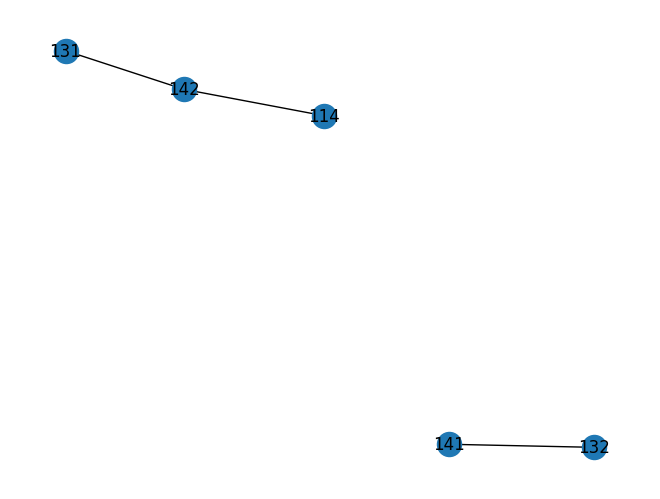

for upstream node 132, winning_node = 141, error_branches = [114 131 142]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1844.3747246878115 but max skip distance was 1906.2663347269172
Current node skip distance was 1482.9948556594147 but max skip distance was 1482.9948556594147
Current node skip distance was 1476.5092462892164 but max skip distance was 1476.5092462892164
Current node skip distance was 1959.6338635927423 but max skip distance was 1959.6338635927423
Current node skip distance was 1438.6446821350578 but max skip distance was 1438.6446821350578
Current node skip distance was 2300 but max skip distance was 2300.0
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0011646747589111328
Performing Edge Query
After edge filter, # of rows = 7
Exporting the edges
Dele

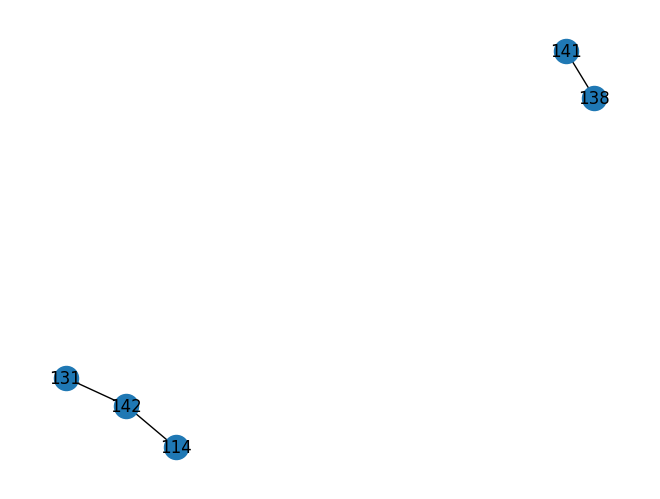

Performing global features query
Done with edge_df: 0.0009407997131347656
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   
1  131  142     14.97   14.582371               0.215027   
2  141  138      8.36  110.378305               0.505674   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0                   0.0                0                       None   
1                   0.0                0                       None   
2                   0.0                0                      False   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   

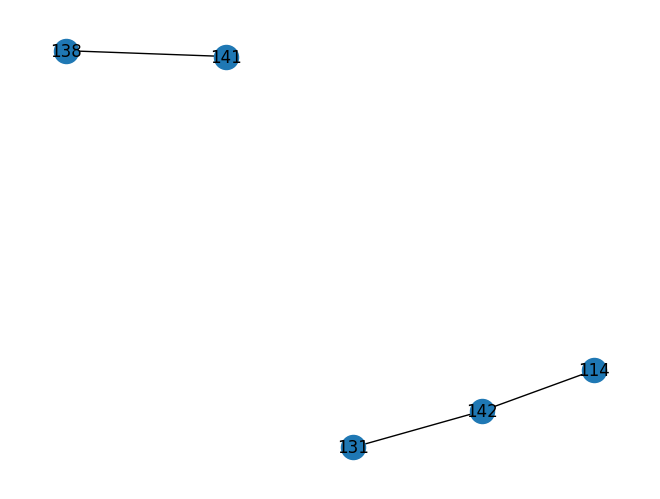

Performing node features query
Done with edge_df: 0.0006844997406005859
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   
1  131  142     14.97   14.582371               0.215027   
2  141  138      8.36  110.378305               0.505674   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0                   0.0                0                       None   
1                   0.0                0                       None   
2                   0.0                0                      False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
2                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff

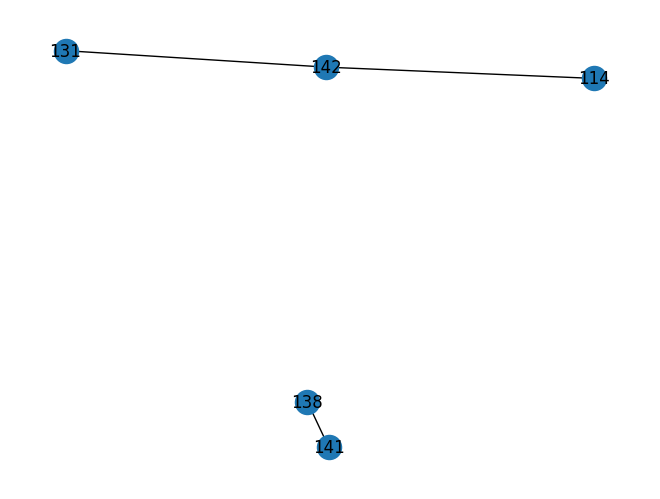

for upstream node 138, winning_node = 141, error_branches = [114 131 142]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1616.2550294890975 but max skip distance was 1616.2550294890975
Current node skip distance was 1388.4752639608032 but max skip distance was 1388.4752639608032
Current node skip distance was 1770.0706002127645 but max skip distance was 1844.3747246878115
Current node skip distance was 1521.950905352955 but max skip distance was 1521.950905352955
Current node skip distance was 1829.4403823438415 but max skip distance was 1829.4403823438415
Current node skip distance was 1421.724095731764 but max skip distance was 1587.281058495119
Current node skip distance was 1558.868122651933 but max skip distance was 1558.868122651933
Current node skip distance was 1536.5908987619796 but max skip distance was 1536.5908987619796
Current node skip distance was 1476.1917328180928 but max skip distan

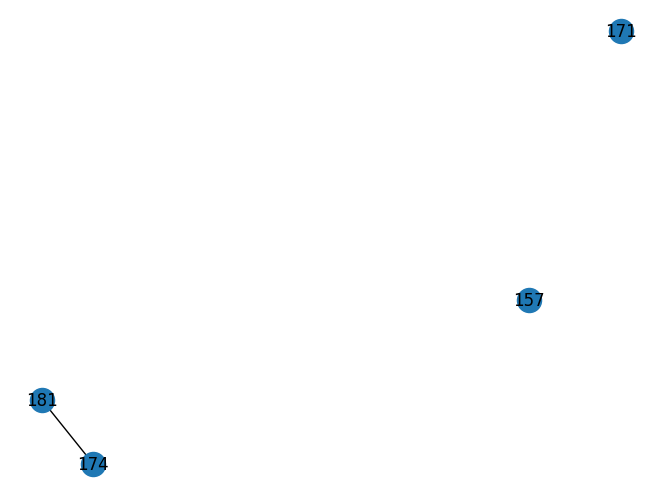

Performing global features query
Done with edge_df: 0.0007677078247070312
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  174  181      6.21    5.336845                0.02557   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   

   definite_partner_width_delete  
0                          False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  174  181      6.21    5.336845                0.02557   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   

   definite_partner_width_delete  
0                          False  


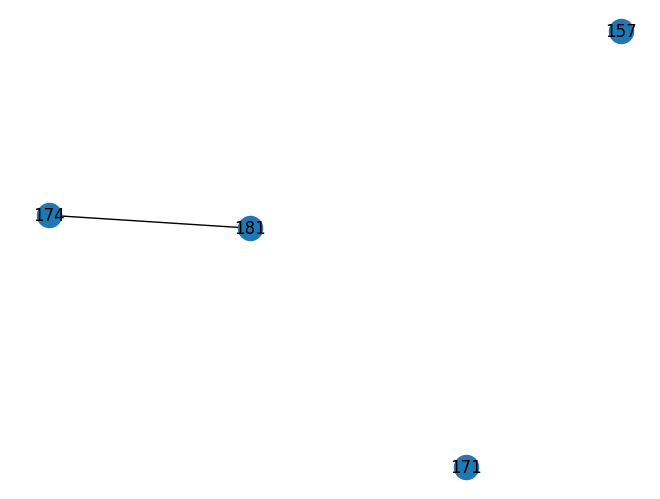

Performing node features query
Done with edge_df: 0.0007524490356445312
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  174  181      6.21    5.336845                0.02557   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  174  181      6.21    5.336845                0.02557   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  


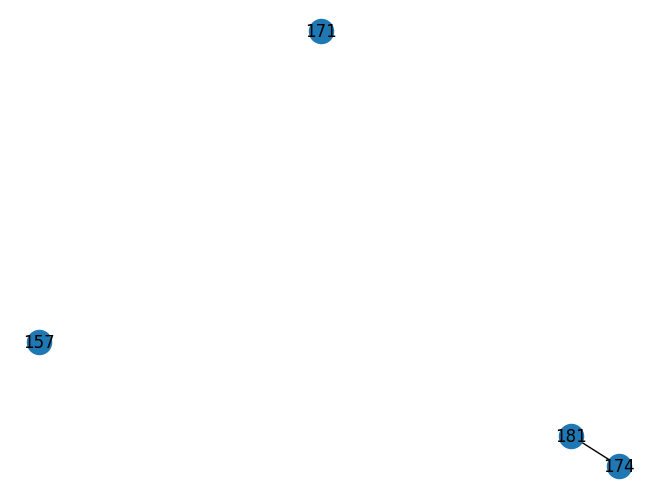

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1839.1475043627702 but max skip distance was 1839.1475043627702
Current node skip distance was 1496.4470846611307 but max skip distance was 1839.1475043627702
Current node skip distance was 1545.639811575495 but max skip distance was 1545.639811575495
Current node skip distance was 1699.7577591472648 but max skip distance was 1699.7577591472648
Current node skip distance was 1547.5571932935732 but max skip distance was 1699.7577591472648
Current node skip distance was 1751.311416623676 but max skip distance was 1751.311416623676
Current node skip distance was 1528.327643905881 but max skip distance was 1528.327643905881
Current node skip distance was 1493.188825278979 but max skip distance was 1751.311416623676
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))


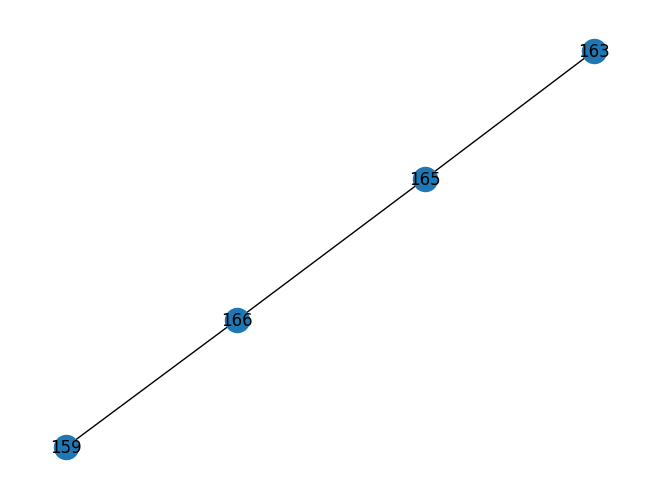

Performing global features query
Done with edge_df: 0.00084686279296875
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  159  166     37.49    9.684155               0.122356   
1  163  165     43.05   61.949422               0.790521   
2  166  165     62.35    8.902172               0.113598   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029                1                       None   
1              0.000146                1                       None   
2              0.000117                0                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  159  166     37.49    9.684155               0.122356   
1

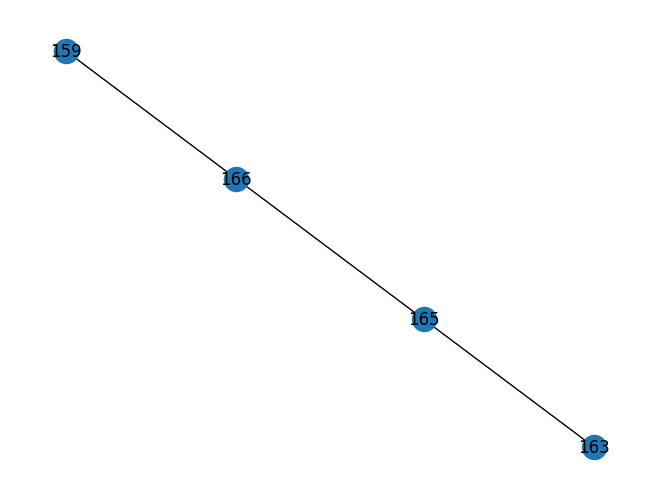

Performing node features query
Done with edge_df: 0.0006163120269775391
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  159  166     37.49    9.684155               0.122356   
1  163  165     43.05   61.949422               0.790521   
2  166  165     62.35    8.902172               0.113598   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029                1                       None   
1              0.000146                1                       None   
2              0.000117                0                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
2                          None                   True  
Afer Node query: 
     u    v  sk_angle  width_diff

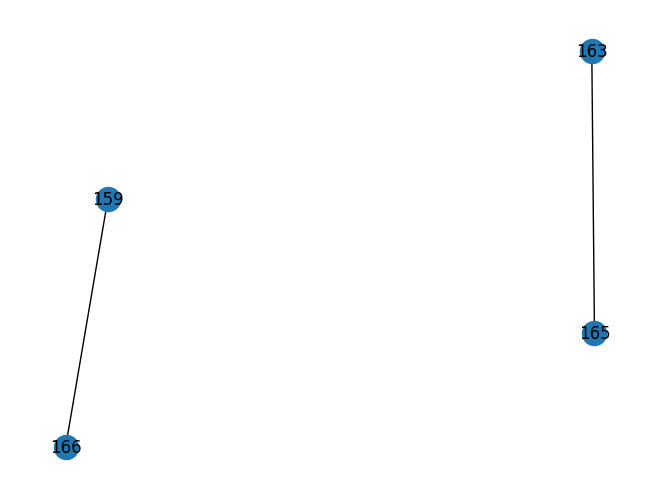

for upstream node 165, winning_node = 163, error_branches = [159 166]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (140.31473998968238) less than width_min(250)
Current node skip distance was 1456.096439990625 but max skip distance was 1456.096439990625
Current node skip distance was 1438.7677292204708 but max skip distance was 1438.7677292204708
Current node skip distance was 1485.8903895950361 but max skip distance was 1823.5915015780708
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0010571479797363281
Performing Edge Query
After edge filter, # of rows = 5
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  165    150.60   12.588237               0.138403   
1  160  175      5.52   66.708406               0.733434   
2  160  168    145.72   

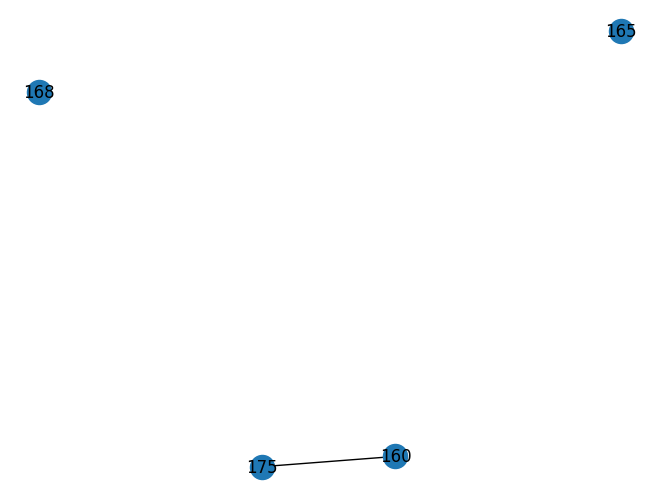

Performing global features query
Done with edge_df: 0.0005602836608886719
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  175      5.52   66.708406               0.733434   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000058                1                       False   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  175      5.52   66.708406               0.733434   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000058                1                       False   

  definite_partner_width_delete  
0                          None  


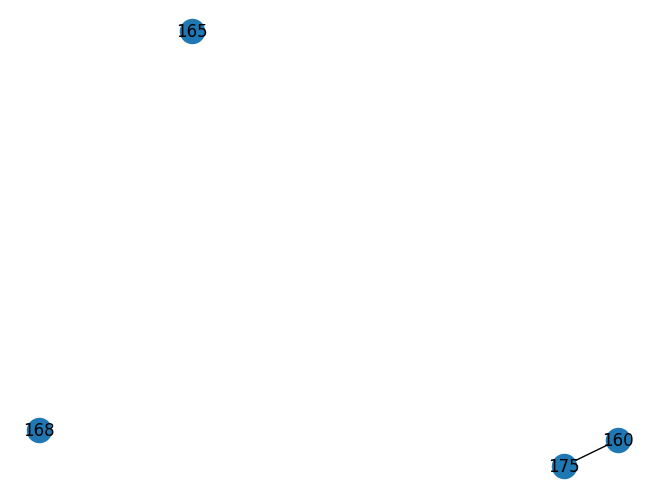

Performing node features query
Done with edge_df: 0.0007355213165283203
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  175      5.52   66.708406               0.733434   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000058                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  175      5.52   66.708406               0.733434   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000058                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


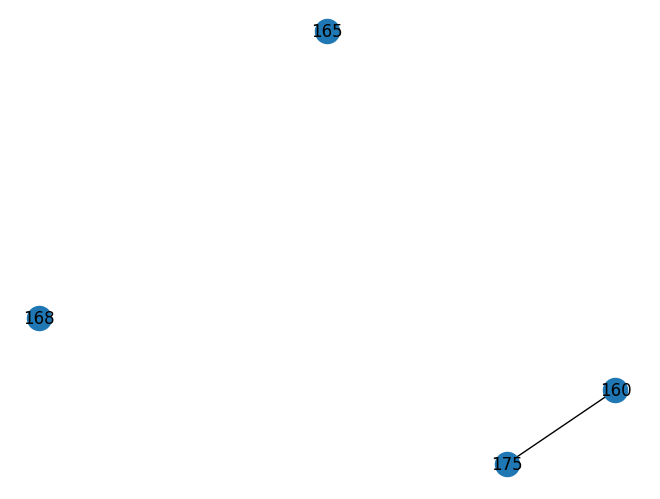

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1499.8793134527978 but max skip distance was 1499.8793134527978
Current node skip distance was 1620.256694044604 but max skip distance was 1620.256694044604
Current node skip distance was 1410.473888302224 but max skip distance was 1545.639811575495
Current node skip distance was 2036.323738865118 but max skip distance was 2300.0
Current node skip distance was 1823.5915015780708 but max skip distance was 1823.5915015780708
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0012307167053222656
Performing Edge Query
After edge filter, # of rows = 6
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  180      6.40    2.188777               0.036149   
1  176  1

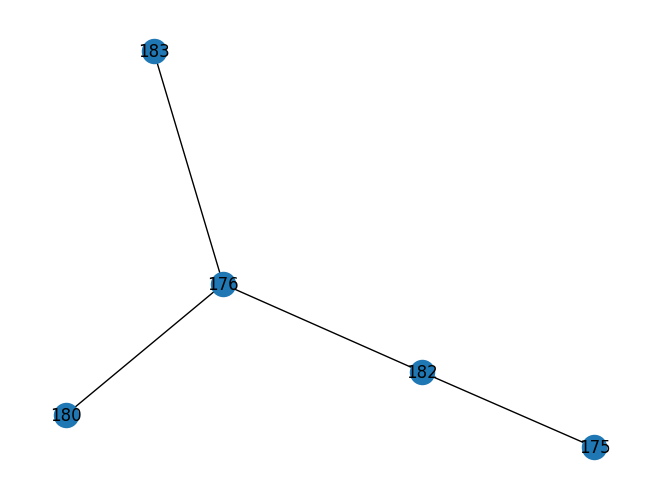

Performing global features query
Done with edge_df: 0.0005917549133300781
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  180      6.40    2.188777               0.036149   
1  176  182     54.70   40.999702               0.677140   
2  176  183      8.95    8.008851               0.132272   
3  182  175     64.98   56.113901               0.355913   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000000                0                       None   
1              0.000243                1                       None   
2              0.000000                0                       None   
3              0.000243                1                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
3       

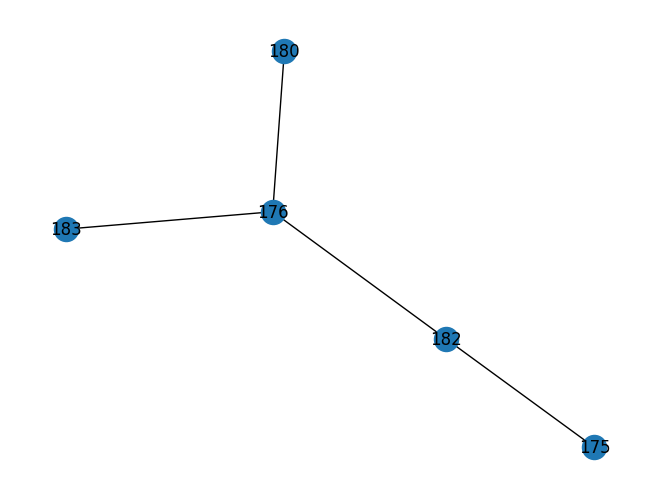

Performing node features query
Done with edge_df: 0.0006444454193115234
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  180      6.40    2.188777               0.036149   
1  176  182     54.70   40.999702               0.677140   
2  176  183      8.95    8.008851               0.132272   
3  182  175     64.98   56.113901               0.355913   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000000                0                       None   
1              0.000243                1                       None   
2              0.000000                0                       None   
3              0.000243                1                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None   

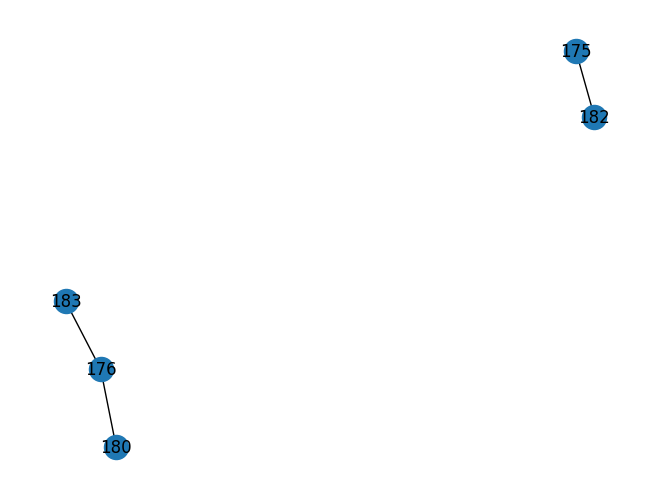

for upstream node 175, winning_node = 182, error_branches = [176 180 183]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1418.9514893910864 but max skip distance was 1418.9514893910864
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1635.4349853174858 but max skip distance was 1635.4349853174858
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0008528232574462891
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  182     54.70   40.999702               0.677140   
1  176  183      8.95    8.008851               0.132272   
2  176  179    165.29   51.956039               0.461813   


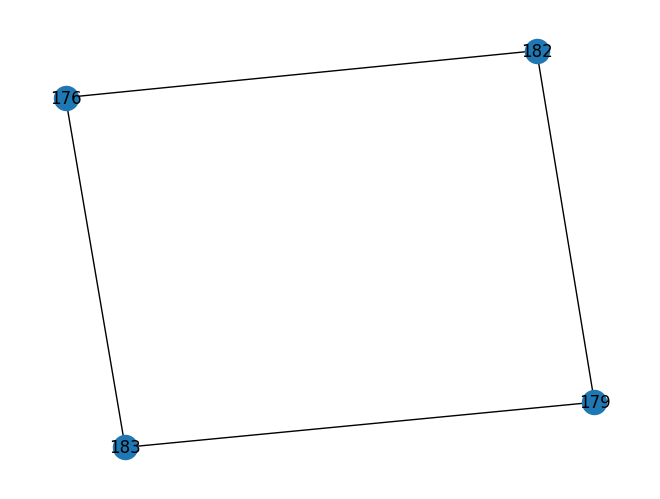

Performing global features query
Done with edge_df: 0.0007183551788330078
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  182     54.70   40.999702               0.677140   
1  176  183      8.95    8.008851               0.132272   
2  182  179     57.59   10.956337               0.097386   
3  183  179     22.87   59.964890               0.533000   

   synapse_density_diff  n_synapses_diff  definite_partner_width_delete  \
0              0.000243                1                           True   
1              0.000000                0                          False   
2              0.000243                1                          False   
3              0.000000                0                           True   

  definite_partner_sk_delete  
0                       None  
1                       None  
2                       None  


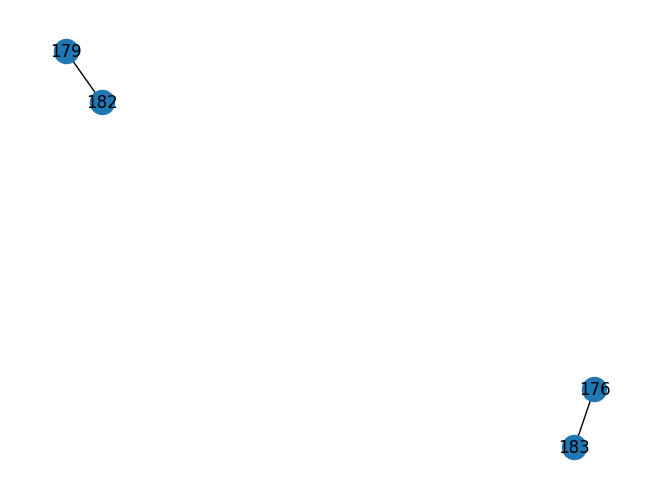

Performing node features query
Done with edge_df: 0.0007963180541992188
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  183      8.95    8.008851               0.132272   
1  182  179     57.59   10.956337               0.097386   

   synapse_density_diff  n_synapses_diff  definite_partner_width_delete  \
0              0.000000                0                          False   
1              0.000243                1                          False   

  definite_partner_sk_delete above_threshold_delete  
0                       None                   None  
1                       None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  183      8.95    8.008851               0.132272   
1  182  179     57.59   10.956337               0.097386   

   synapse_density_diff  n_synapses_d

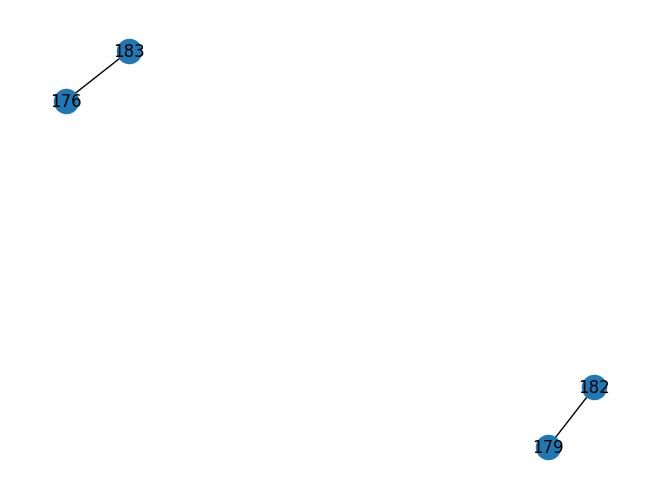

for upstream node 179, winning_node = 182, error_branches = [176 183]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (101.54805929174576) less than width_min(250)
Current node skip distance was 1428.0713915564047 but max skip distance was 1428.0713915564047
Current node skip distance was 2075.700047735279 but max skip distance was 2291.4822082099486
Current node skip distance was 1589.7835803822734 but max skip distance was 1589.7835803822734
Current node skip distance was 1385.5812786224683 but max skip distance was 1385.5812786224683
Current node skip distance was 2084.222558795099 but max skip distance was 2084.222558795099
Current node skip distance was 1907.1869472675644 but max skip distance was 1907.1869472675644
limb_branch_dict_to_cancel = {'L3': array([105, 115, 102, 104, 145, 178, 147, 177, 150, 153, 156, 157, 152,
       173, 168, 167, 179, 182, 163, 184, 185, 187, 189, 186, 188,  96,
        65,  64,  67,  71,  74,  77,  85,  88, 154, 155, 158, 16

In [65]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

neuron_obj_proof = npu.auto_proof_stage(
    neuron_obj_axon,
    mesh_decimated = mesh_decimated,
    calculate_after_proof_stats = False,
)

In [66]:
_ = npu.after_auto_proof_stats(
    neuron_obj_proof,
    store_in_obj = True,
)


Working on compartment basal---
Compartment limb stats = {'n_limbs': 4, 'soma_angle_max': 125.97, 'soma_angle_min': 90.34}

Working on compartment apical_total---
Compartment limb stats = {'n_limbs': 1, 'soma_angle_max': 31.17, 'soma_angle_min': 31.17}

Working on compartment axon---
Compartment limb stats = {'n_limbs': 1, 'soma_angle_max': 156.14, 'soma_angle_min': 156.14}

Working on compartment dendrite---
Compartment limb stats = {'n_limbs': 5, 'soma_angle_max': 125.97, 'soma_angle_min': 31.17}


# Saving off the autoproofread neuron

In [69]:
vdi.save_neuron_obj_auto_proof(
    neuron_obj_proof,
)

Total time for soma meshes compression = 0.6087055206298828
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 0.22994232177734375
Total time for limb_meshes compression = 1.1556549072265625
    Starting Limb Correspondence Compression
Total time for new_limb_correspondence compression = 6.34101414680481
Cleared mesh: <trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>:139655901614336
Cleared mesh: <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>:139656618673824
Cleared mesh: <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>:139657048888128
Cleared mesh: <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>:139657048887360
Cleared mesh: <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>:139655901616688
Cleared mesh: <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>:139655901617744
Cleared mesh: <trimesh.Trimesh(vertices

'864691134917511946_auto_proof.pbz2'

# Plotting the final neuron

In [ ]:
from neurd import synapse_utils as syu

In [ ]:
synapse_df = syu.synapse_df(neuron_obj_proof)
synapse_df

In [ ]:
from datasci_tools import ipyvolume_utils as ipvu
ipvu.plot_objects(
    neuron_obj_axon.mesh,
    meshes = [neuron_obj_proof.mesh],
    meshes_colors="red"
)

In [ ]:
syu.plot_synapses(neuron_obj_proof)

In [ ]:
syu.plot_synapses_error_from_neuron_obj(neuron_obj_proof)    

In [ ]:
syu.plot_synapses_valid_from_neuron_obj(neuron_obj_proof)  

In [67]:
nviz.plot_compartments(neuron_obj_proof)

[autoreload of neurd.synapse_utils failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 471, in superreload
    module = reload(module)
  File "/usr/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/neurd_packages/NEURD/neurd/synapse_utils.py", line 4153
    coordinates_nm = coordinates_nm,
    ^
SyntaxError: keyword argument repeated
]



 Working on visualization type: mesh


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

apical:blue
apical_shaft:aqua
apical_tuft:purple
basal:yellow
axon:red
oblique:green


Unlabeled: transparent green
